In [263]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import csv

In [426]:
# Allgraphs_SW = "../Data/reddit_suicideWatch/SW_morethan10_graphs_complete_revised/SW_morethan10_deeper_replygraphs_v3.pkl"
Allgraphs_SW = "../Data/reddit_suicideWatch/SW_allValidThreads_graphs/SW_Allvalid_Graphs_Depth_fixed.pkl"
# Allgraphs_BL2 = "../Data/reddit_TheDonald/theDonald_graph/TheDonald_replygraphs.pkl"
Allgraphs_BL = "../Data/FrontPage/graphs/frontPage_replygraphs.pkl"

In [ ]:
allGraphs = pkl.load(open(Allgraphs_SW,'rb'))

In [427]:
allGraphs_SW = 
allGraphs_BL = pkl.load(open(Allgraphs_BL,'rb'))
# allGraphs_BL2 = pkl.load(open(Allgraphs_BL2,'rb'))

In [4]:
textDict = {}
for k in allGraphs_BL:
    postText = nx.get_node_attributes(allGraphs_BL[k],'text')
    textDict.update(postText)

In [5]:
len(allGraphs_SW)

10157

In [6]:
len(textDict)

579817

In [7]:
def readModeratorFile(f):
    modIds = []
    modMeta = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
        modMeta.append(k)
    return modIds, modMeta

In [8]:
SW_mods, SW_modMeta = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [9]:
print SW_mods, len(SW_mods)

[u'S2S2S2S2S2', u'qgyh2', u'Psy-Kosh', u'SicSemperHumanus', u'SQLwitch', u'UnDire', u'pkbooo', u'skyqween', u'MykeeB', u'circinia', u'svabhava-sunya', u'sofar1776'] 12


In [10]:
SW_modMeta[1]

{u'author_flair_css_class': None,
 u'author_flair_text': None,
 u'date': 1230644033.0,
 u'id': u't2_1uzpp',
 u'mod_permissions': [u'all'],
 u'name': u'qgyh2'}

In [11]:
import datetime
times = [datetime.datetime.fromtimestamp(int(k['date'])).strftime('%Y-%m-%d %H:%M:%S')  for k in SW_modMeta  ]

In [12]:
print times

['2008-12-16 13:46:24', '2008-12-30 13:33:53', '2010-01-10 17:51:57', '2010-09-09 08:16:49', '2010-09-16 04:17:50', '2011-12-11 21:53:18', '2012-02-08 01:47:35', '2012-09-16 21:45:42', '2013-11-17 13:10:44', '2014-06-05 02:57:29', '2014-07-08 12:15:35', '2017-11-12 00:53:36']


In [13]:
AS_mods = readModeratorFile("../Data/reddit_TheDonald/moderators.json")

In [14]:
print AS_mods , len(AS_mods)

([u'shadowman3001', u'Grakmarr', u'US2A', u'sublimeinslime', u'Trumpshaker', u'zettapede', u'thunderbert80', u'Ivaginaryfriend', u'Foss_is_Boss', u'mivvan', u'Katfish29', u'IanPatrick1966', u'lalicat', u'Trumpropriation', u'Knollsit', u'richmomz', u'SportzStar', u'lolmonger', u'MorePancakes', u'D4rkd3str0yer', u'Sanotsuto', u'bh506407', u'pm_me_yo_doggos', u'CovfefeBucks', u'eGOTheJudge', u'DrWeeGee', u'Keln78', u'DanWofSoc', u'BotForceOne', u'AutoModerator', u'Medically', u'Velostodon'], [{u'author_flair_css_class': u'tomahawkmissile', u'author_flair_text': u'MHM', u'mod_permissions': [u'all'], u'date': 1495507695.0, u'id': u't2_5y6sb', u'name': u'shadowman3001'}, {u'author_flair_css_class': u'treadonme', u'author_flair_text': u'1776', u'mod_permissions': [u'all'], u'date': 1508277635.0, u'id': u't2_a9f6l', u'name': u'Grakmarr'}, {u'author_flair_css_class': u'captain', u'author_flair_text': u'MAGA', u'mod_permissions': [u'all'], u'date': 1508277639.0, u'id': u't2_uuiui', u'name': u'US

In [15]:
import csv
fieldnames = ['postid', 'text']
with open('../Data/FrontPage/FP_Alltext.csv', 'wb') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    dict_writer.writeheader()
    for k in textDict:
        dict_writer.writerow({'postid': k , 'text': textDict[k]})


In [16]:
# LIWC_BL2 = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_BL = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/FrontPage/LIWC2015_FP_Alltext.csv")
# LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SW_Alltext.csv")

In [17]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [18]:
print len(LIWC_SW) , len(LIWC_BL)

419575 579817


In [19]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_BL.drop(LIWC_BL.index[0])
# LIWC_BL2.drop(LIWC_BL2.index[0])

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,t1_duid45o,This image never fails to unreasonably irritat...,8,11.24,1.00,74.76,1.00,8.00,25.00,87.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,t1_duiocnf,Go to a different meeting? Or try https://www....,12,98.02,20.24,74.76,25.77,6.00,25.00,75.00,...,0.00,0.00,0.00,8.33,0.00,0.00,0.00,0.00,0.00,16.67
3,t1_duid45l,"It's the weirdest thing. In puberty, everybody...",23,23.89,66.81,2.02,1.00,7.67,26.09,95.65,...,8.70,0.00,0.00,4.35,0.00,0.00,0.00,8.70,0.00,0.00
4,t1_duix6dj,"If Joel McCale makes you wet, I can't imagine ...",14,1.80,7.67,13.15,25.77,14.00,7.14,71.43,...,7.14,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.00,0.00
5,t3_7ymlcg,NaN,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,t3_6yb7sg,NaN,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,t1_duiocnl,I am closer to 30 than 20.,7,92.84,1.00,99.00,25.77,7.00,0.00,71.43,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,t1_dujuvgn,It’s definitely OK to criticize other cultures...,215,8.71,44.46,61.75,33.81,35.83,15.35,92.56,...,4.65,0.93,0.00,0.47,0.00,0.00,4.65,4.19,0.00,0.00
9,t1_duiocnn,"Ha ha, that was probably a quarter of the way ...",11,98.22,50.00,2.40,99.00,11.00,27.27,100.00,...,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,t1_duiocno,Team Dank Lava.,3,92.84,99.00,1.00,25.77,3.00,0.00,66.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        #affectDict[row['A']] =row['posemo'] - row['negemo']
        affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 )
            else:
                userGraph[src][dst]['weight'] += 1
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [21]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_BL)

In [22]:
updateAffects(allGraphs_SW,affectDict_SW)

In [23]:
updateAffects(allGraphs_BL,affectDict_BL)

In [24]:
print len(allGraphs_SW) , len(allGraphs_BL)

10157 9182


In [265]:
sumithraTextSW = {}
sumitraTextBL = {}

for k in allGraphs_SW:
    for n in allGraphs_SW[k].nodes(data=True):
        if 'depth' in n[1]:
            sumithraTextSW[n[0]] = dict()
            sumithraTextSW[n[0]]['text'] = n[1].get('text','')
            sumithraTextSW[n[0]]['depth'] = n[1]['depth']
            sumithraTextSW[n[0]]['tone'] = n[1].get('affects',0)
            sumithraTextSW[n[0]]['popularity'] = n[1]['ups'] - n[1]['downs']

    

In [266]:
for k in allGraphs_BL:
    for n in allGraphs_BL[k].nodes(data=True):
        if 'depth' in n[1]:
            sumitraTextBL[n[0]] = dict()
            sumitraTextBL[n[0]]['text'] = n[1].get('text','')
            sumitraTextBL[n[0]]['depth'] = n[1]['depth']
            sumitraTextBL[n[0]]['tone'] = n[1].get('affects',0)
            sumitraTextBL[n[0]]['popularity'] = n[1]['ups'] - n[1]['downs']

In [267]:
len(sumithraTextSW), len(sumitraTextBL)

(216992, 579817)

In [277]:
sumitraTextBL[sumitraTextBL.keys()[1]]

{'depth': 3,
 'popularity': 11,
 'text': 'This image never fails to unreasonably irritate me',
 'tone': 1.0}

In [272]:
# with open("SuicideWatchText.pkl",'wb') as f:
#     pkl.dump(sumithraTextSW,f,protocol=pkl.HIGHEST_PROTOCOL)



# with open("baseLineText.pkl",'wb') as f:
#     pkl.dump(sumitraTextBL,f,protocol=pkl.HIGHEST_PROTOCOL)

In [ ]:
# allGraphs_SW[allGraphs_SW.keys()[2]].nodes(data=True)[0][1]['text']

In [26]:
allGraphs_BL[allGraphs_BL.keys()[2]].nodes(data=True)

[(u't1_dui95cm',
  {'affects': 25.77,
   'author': u'x54dc5zx8',
   'depth': -1,
   'downs': 0,
   'text': 'by chungu https://twitter.com/chungu_u9/status/965158105846767616',
   'time': 1519071583.0,
   'ups': 2}),
 (u't3_7yprd8',
  {'affects': 0.0,
   'author': u'x54dc5zx8',
   'depth': -1,
   'downs': 0,
   'text': '',
   'time': 1519071558.0,
   'ups': 213}),
 (u't1_dujtpy6',
  {'affects': 99.0,
   'author': u'CutiePabooty',
   'depth': -1,
   'downs': 0,
   'text': 'Beautiful hair!',
   'time': 1519146828.0,
   'ups': 1})]

In [27]:
def getAuthors(graphs):
    authors = {}
    for k in graphs:
        g = graphs[k]
        auth = nx.get_node_attributes(g,'author')
        for a in auth:
            if auth[a] in authors:
                authors[auth[a]]+=1
            else:
                authors[auth[a]]=1
    return authors

In [28]:
authCount_SW = getAuthors(allGraphs_SW)
authCount_BL = getAuthors(allGraphs_BL)

In [29]:
print max(authCount_SW.values()), max(authCount_BL.values())

37691 5899


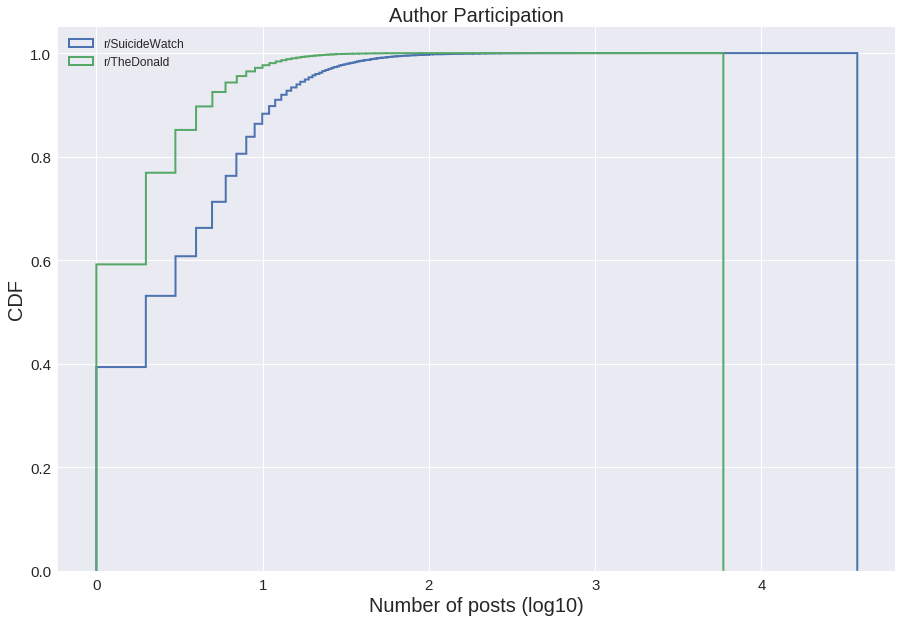

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(authCount_SW.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(authCount_BL.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Author Participation", fontsize = 20)
plt.xlabel("Number of posts (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch' , 'r/TheDonald'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [31]:
sortedAuths_SW = sorted(authCount_SW.items(), key=operator.itemgetter(1))

top1percent_SW = sortedAuths_SW[-(int(0.01*len(sortedAuths_SW))):-1]

top1percent_SW_auths = [k[0] for k in top1percent_SW]

print len(top1percent_SW_auths) , len(SW_mods)
print float(len(list(set(top1percent_SW_auths).intersection(set(SW_mods)))))/float(len(top1percent_SW))

309 12
0.0323624595469


In [32]:
sortedAuths_BL = sorted(authCount_BL.items(), key=operator.itemgetter(1))

top1percent_BL = sortedAuths_BL[-(int(0.01*len(sortedAuths_BL))):-1]

top1percent_BL_auths = [k[0] for k in top1percent_BL]

print len(top1percent_BL_auths) , len(AS_mods)
# print float(len(list(set(top1percent_BL_auths).intersection(set(AS_mods)))))/float(len(top1percent_BL))

2477 2


In [33]:
allGraphs_BL[allGraphs_BL.keys()[19]].nodes(data=True)

[(u't3_7yq1n5',
  {'affects': 0.0,
   'author': u'MusicforEarthworms',
   'depth': -1,
   'downs': 0,
   'text': '',
   'time': 1519073593.0,
   'ups': 2121}),
 (u't1_duihcdi',
  {'affects': 25.77,
   'author': u'jovialjukebox',
   'depth': -1,
   'downs': 0,
   'text': 'What is this? A fur-rari?',
   'time': 1519079637.0,
   'ups': 85}),
 (u't1_duj7kie',
  {'affects': 25.77,
   'author': u'swirling_archer',
   'depth': -1,
   'downs': 0,
   'text': '*Commencing 2 hour yipping session*',
   'time': 1519113164.0,
   'ups': 4}),
 (u't1_duixg8o',
  {'affects': 25.77,
   'author': u'SpaceGuy720',
   'depth': 1,
   'downs': 0,
   'text': 'Cmon guys, its a borkla model X',
   'time': 1519097677.0,
   'ups': 31}),
 (u't1_dujm4hf',
  {'affects': 25.77,
   'author': u'Specstar',
   'depth': -1,
   'downs': 0,
   'text': 'Dedicated shoob-compartment.',
   'time': 1519139480.0,
   'ups': 1}),
 (u't1_dujm0le',
  {'affects': 25.77,
   'author': u'HickeyDE',
   'depth': 4,
   'downs': 0,
   'text': 

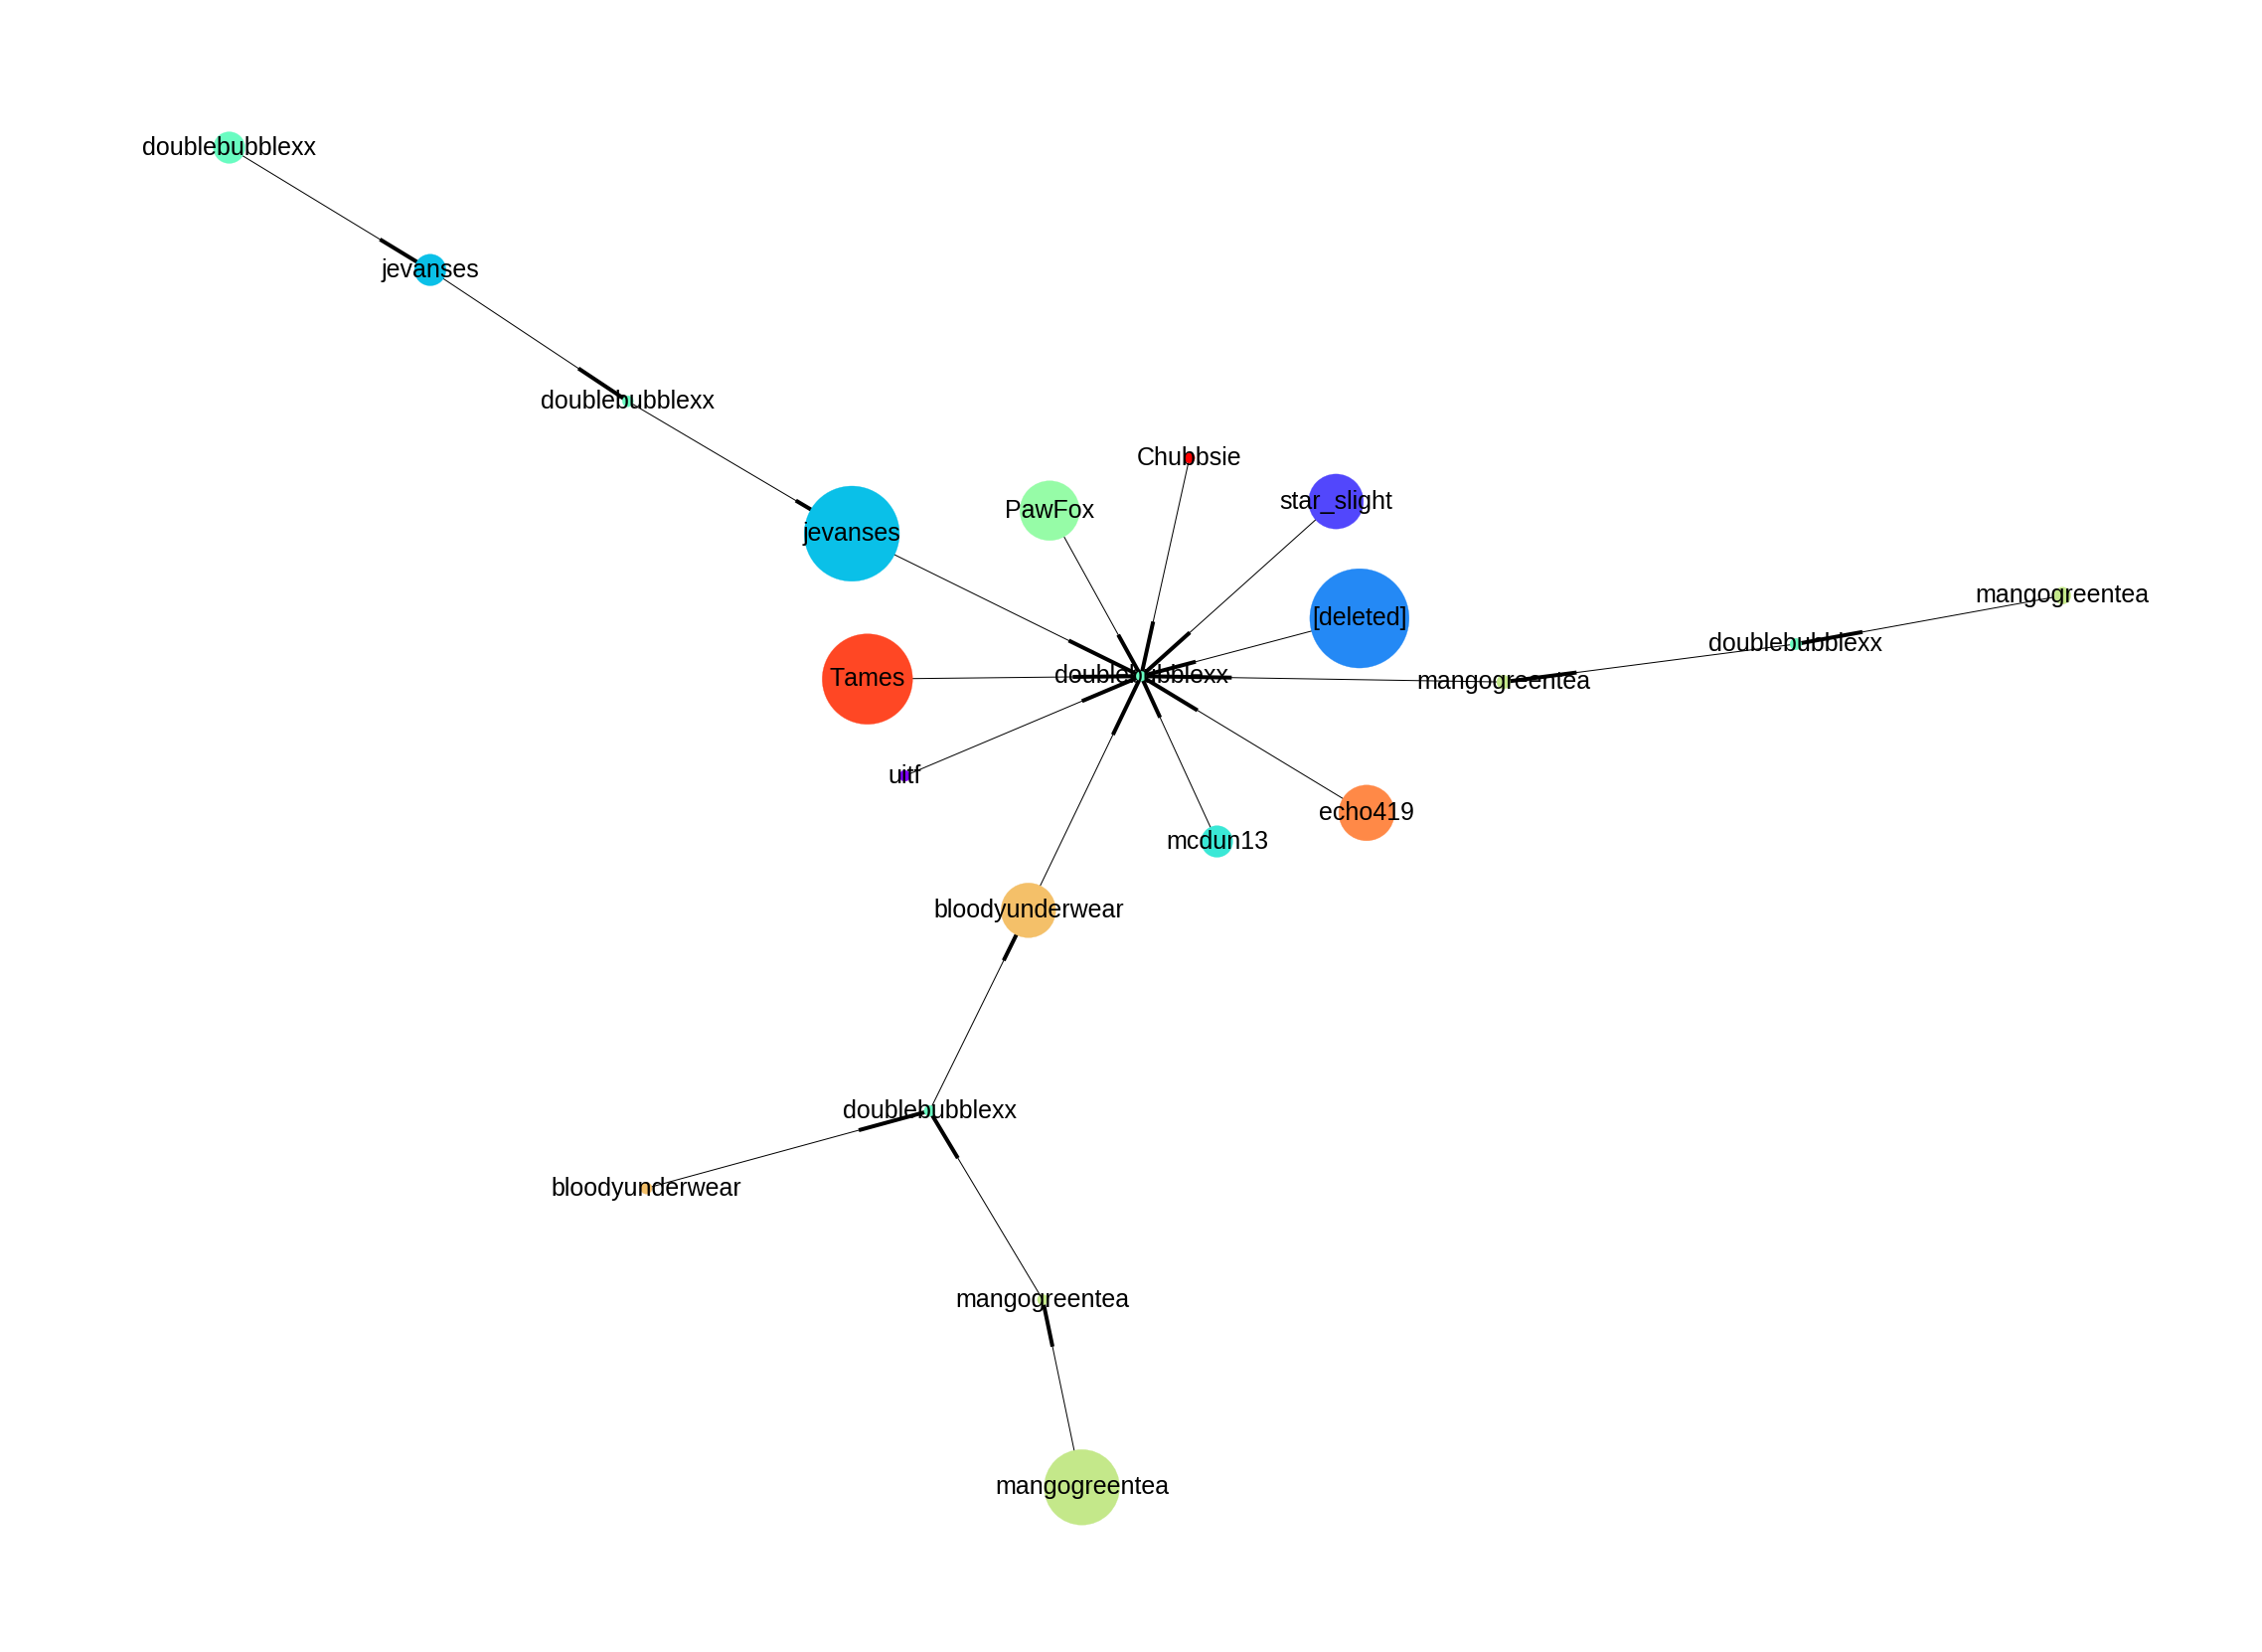

In [34]:
drawReplyGraph(allGraphs_SW[allGraphs_SW.keys()[15]])

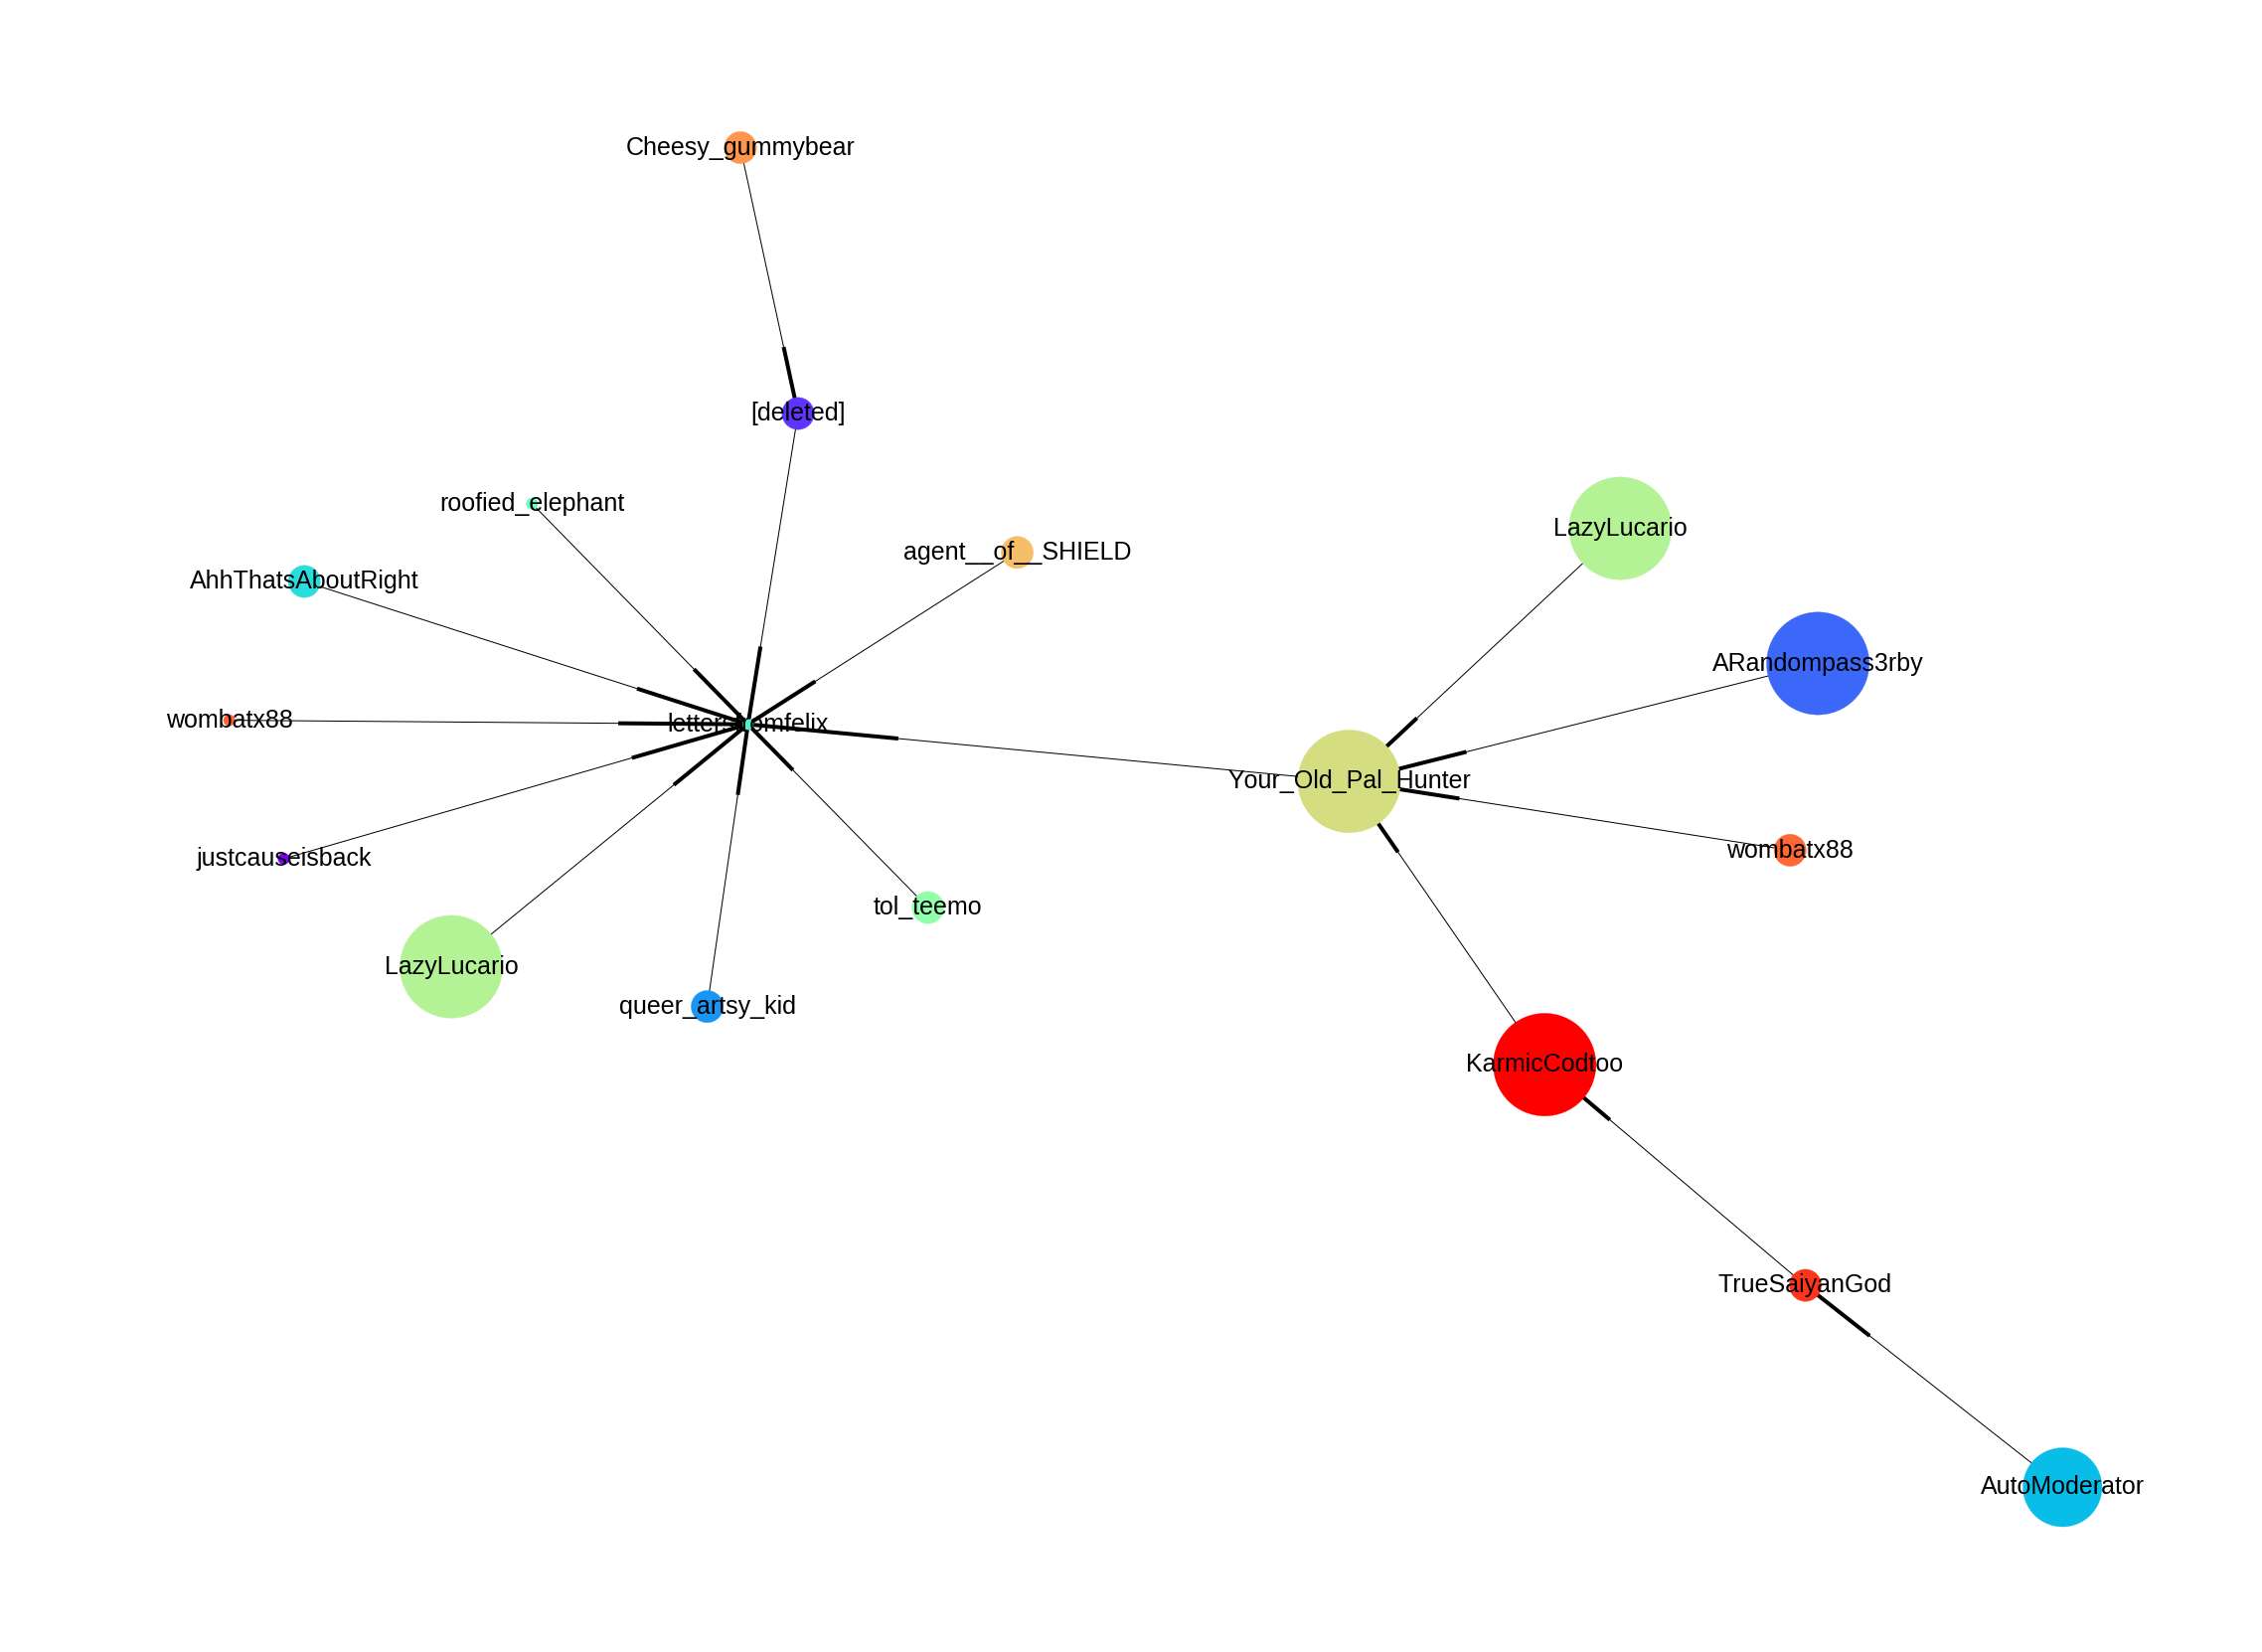

In [35]:
drawReplyGraph(allGraphs_BL[allGraphs_BL.keys()[150]])

In [36]:
userGraphs_SW = createUserGraphs(allGraphs_SW)

In [37]:
userGraphs_BL = createUserGraphs(allGraphs_BL)

In [421]:
print len(userGraphs_SW)

10157


In [422]:
#Save sampled USer Graphs: 
with open("../Data/SW_ugraph.pkl",'wb') as f:
    gpkl.dump(file=f , obj=userGraphs_SW)

In [423]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/FP_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_BL)

16


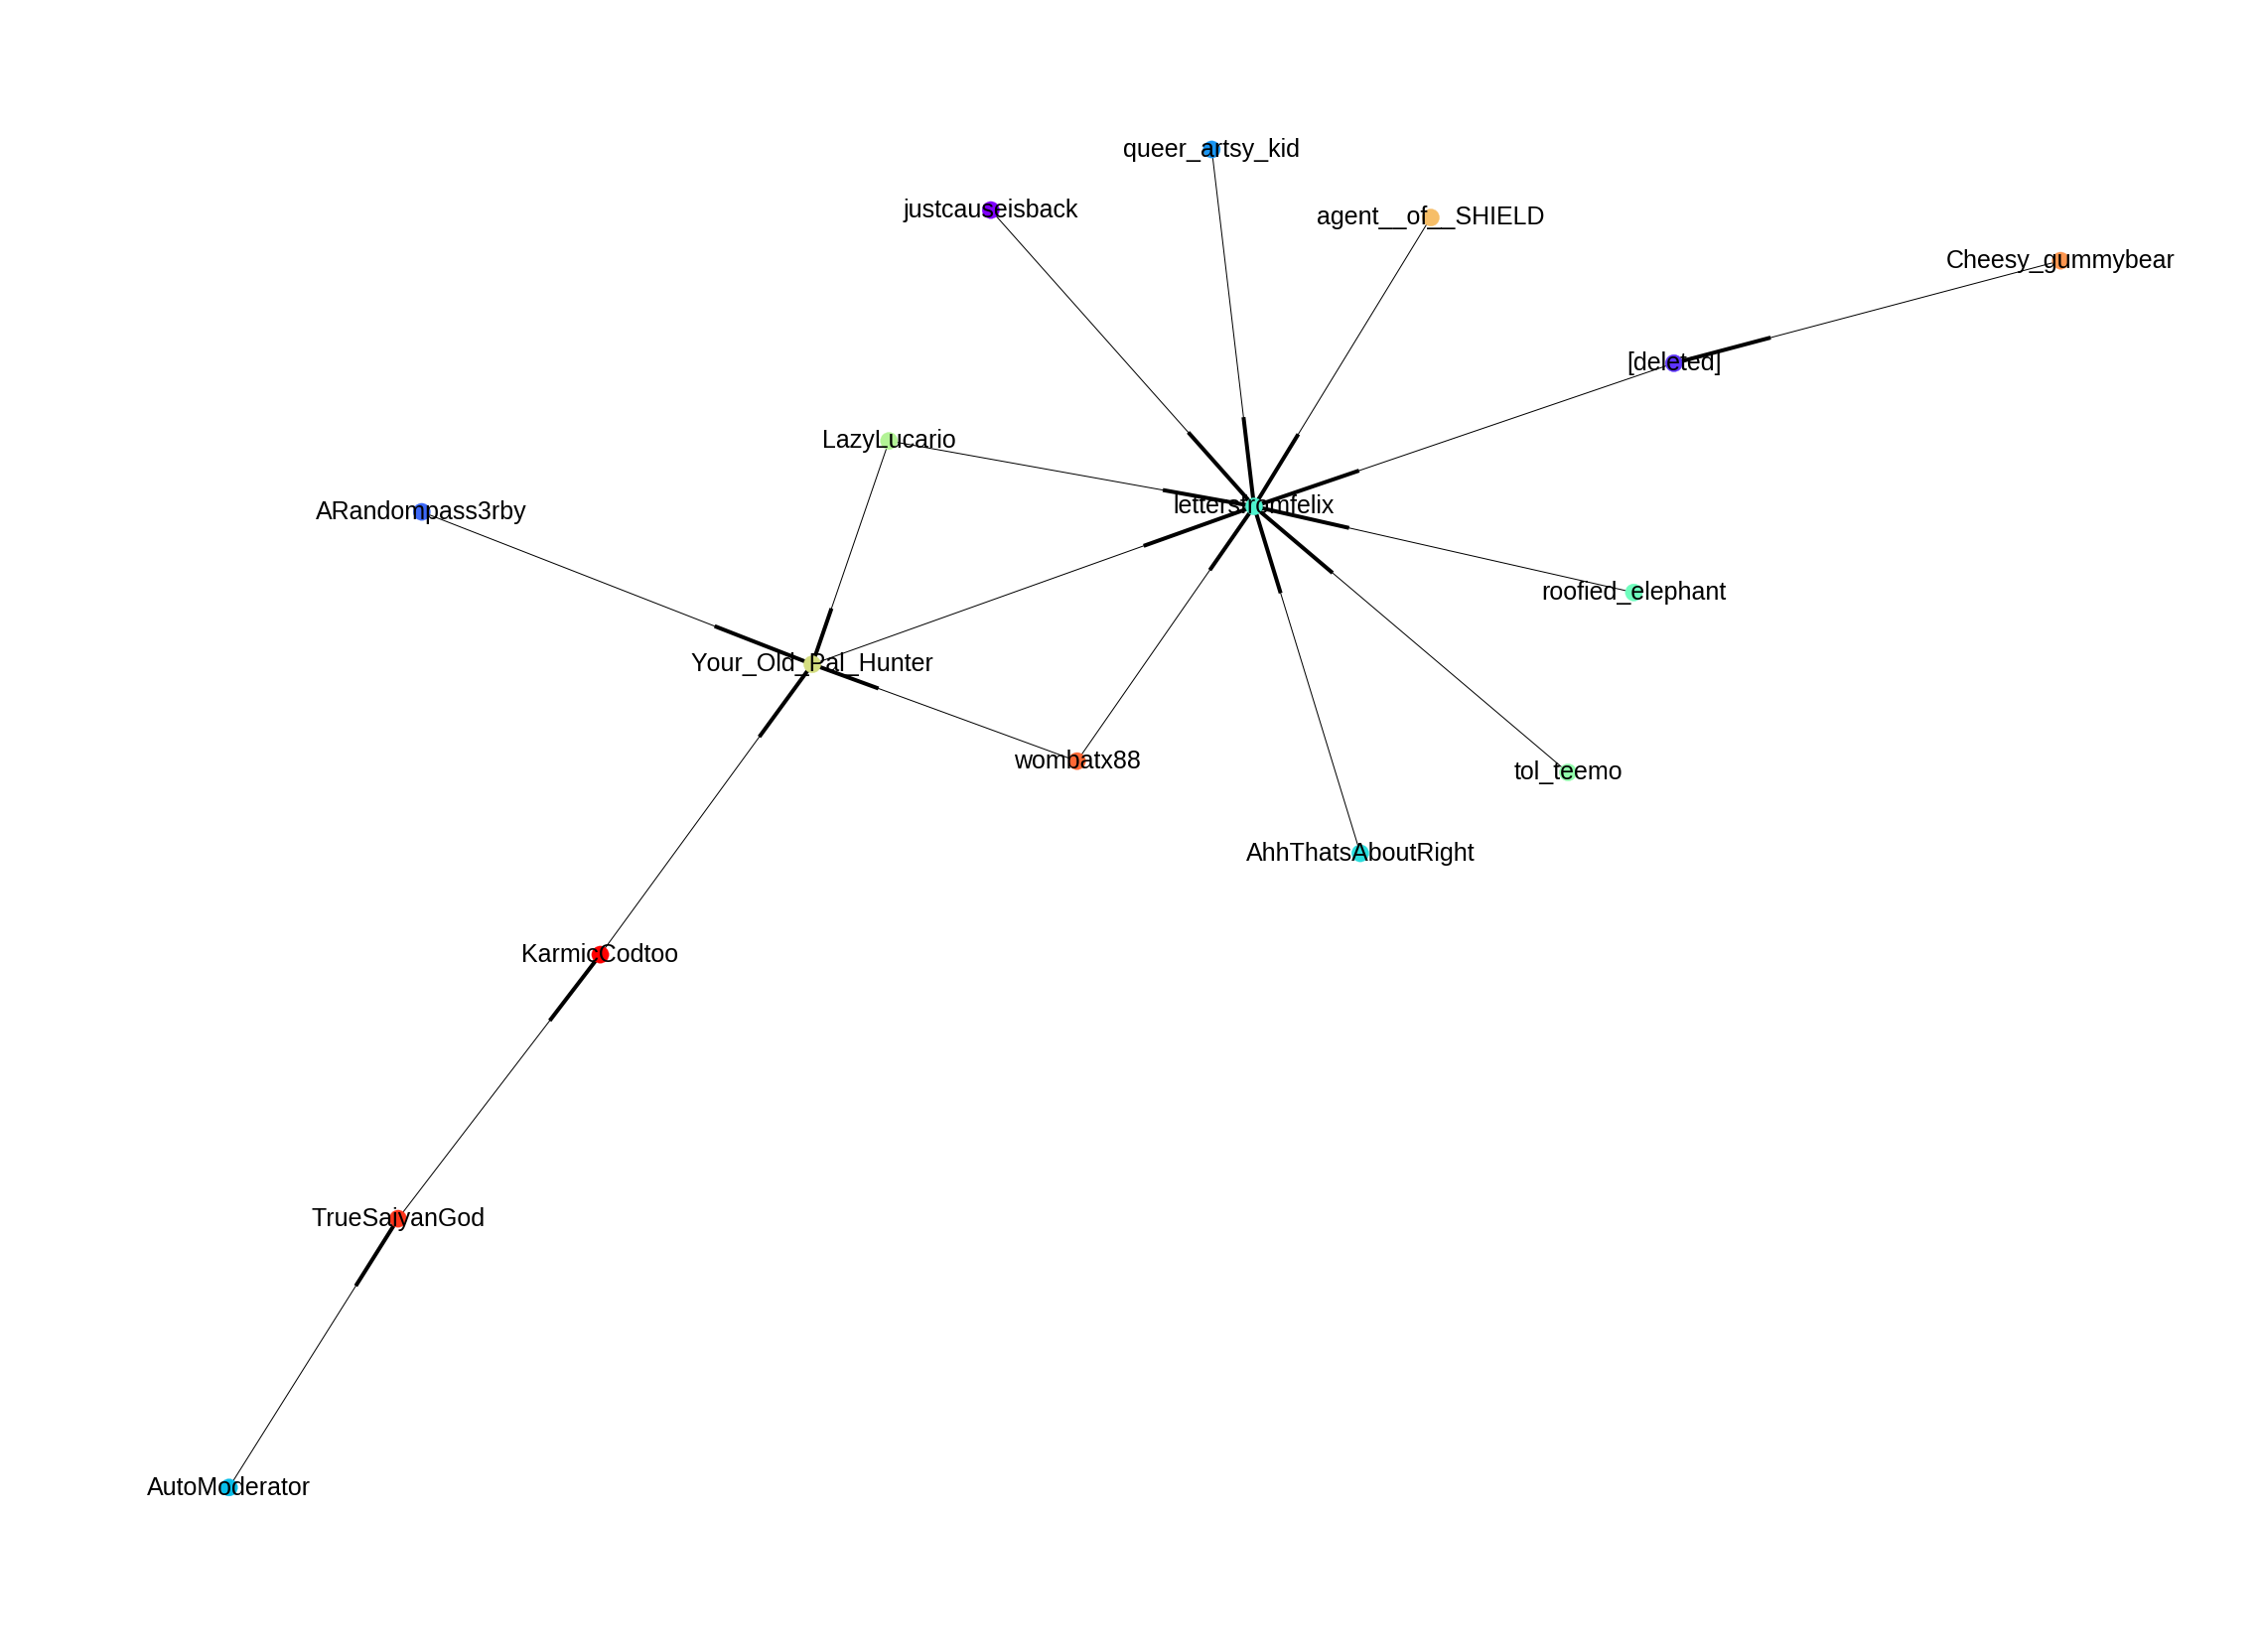

In [424]:
drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[150]])

12


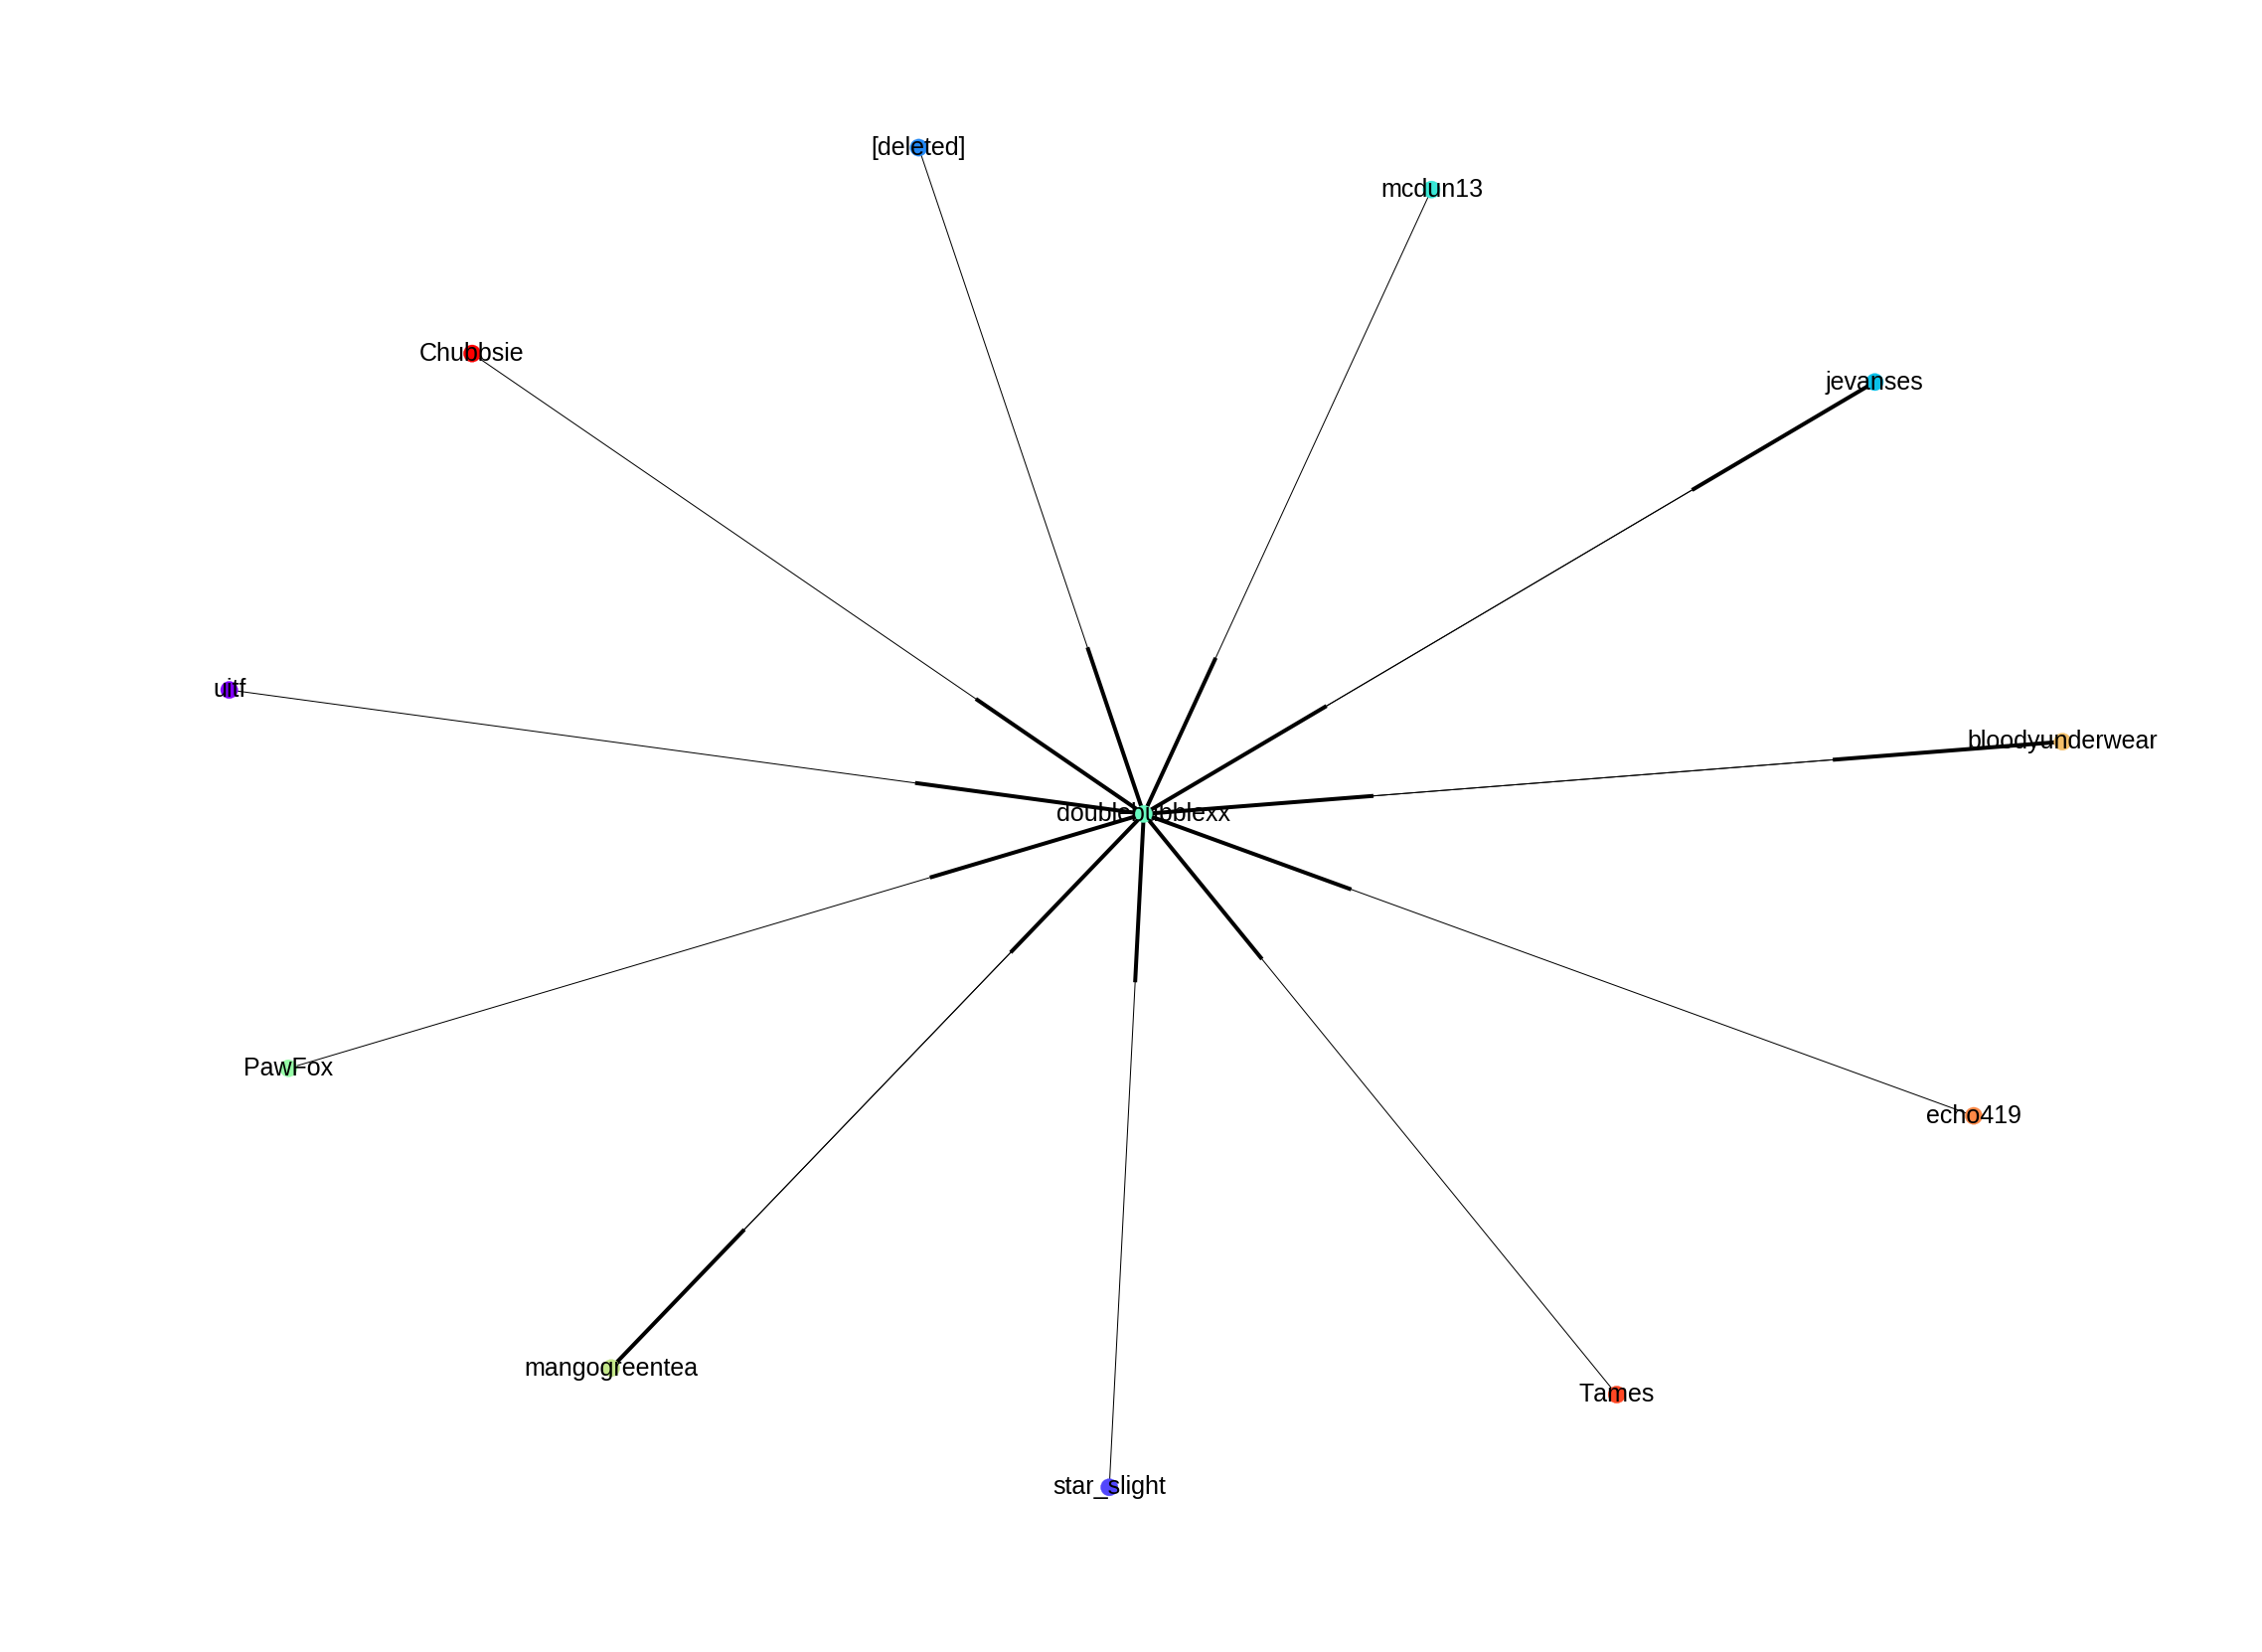

In [425]:
drawUserGraph(userGraphs_SW[allGraphs_SW.keys()[15]])

In [42]:
# drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[1]])

In [43]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [44]:
opAuthors_SW = getRootauthors(allGraphs_SW)
opAuthors_BL = getRootauthors(allGraphs_BL)

In [45]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)

10157 10157
9182 9182


In [46]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW)

9096 8053


In [49]:
# sampled = random.sample(filteredUGraphs_SW.keys(),len(filteredUGraphs_BL))
sampled = filteredUGraphs_SW.keys()
print len(sampled)
sampledUgraphs_SW = {}
sampledReply_SW = {}
for k in sampled: 
    sampledUgraphs_SW[k] = filteredUGraphs_SW[k]
    sampledReply_SW[k] = allGraphs_SW[k]

8053


In [50]:
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = allGraphs_BL[k]

In [51]:
len(sampledReply_SW) , len(sampledUgraphs_SW)

(8053, 8053)

In [52]:
#Save sampled USer Graphs: 
# with open("../Data/SW_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampledUgraphs_SW)
    

# with open("../Data/AS_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_BL)

In [53]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k] for k in depth]
    return depths
        

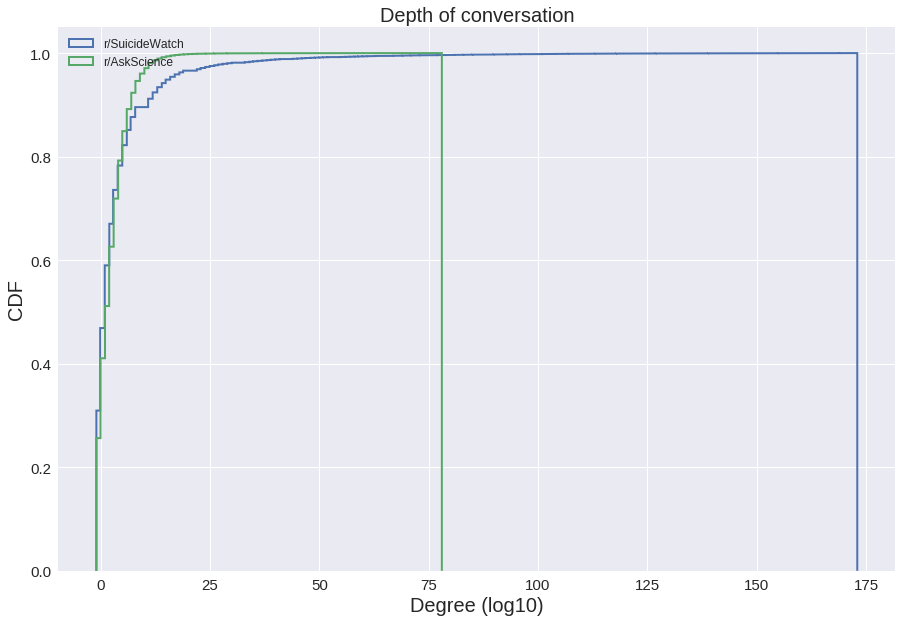

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(getDepths(sampledReply_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(getDepths(filteredReply_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Depth of conversation", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [55]:
from scipy.stats import mannwhitneyu
def findMannWhitney(vec1 , vec2):
    if len(vec1) > len(vec2):
        vec1 = random.sample(vec1 , len(vec2))
    elif len(vec2) > len(vec1): 
        vec2 = random.sample(vec2 , len(vec1))
    else:
        print "Samples are same size, no need to resample"
    statistic , pvalue = mannwhitneyu(vec1, vec2)
    return statistic, pvalue
        

In [56]:
print len(getDegreeDist(filteredReply_BL) ), len(getDegreeDist(sampledReply_SW))

stats , pvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(filteredReply_BL))
normstats , normpvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(sampledReply_SW))
print stats/normstats, pvalue

574349 170132
Samples are same size, no need to resample
0.8324163426131892 0.0


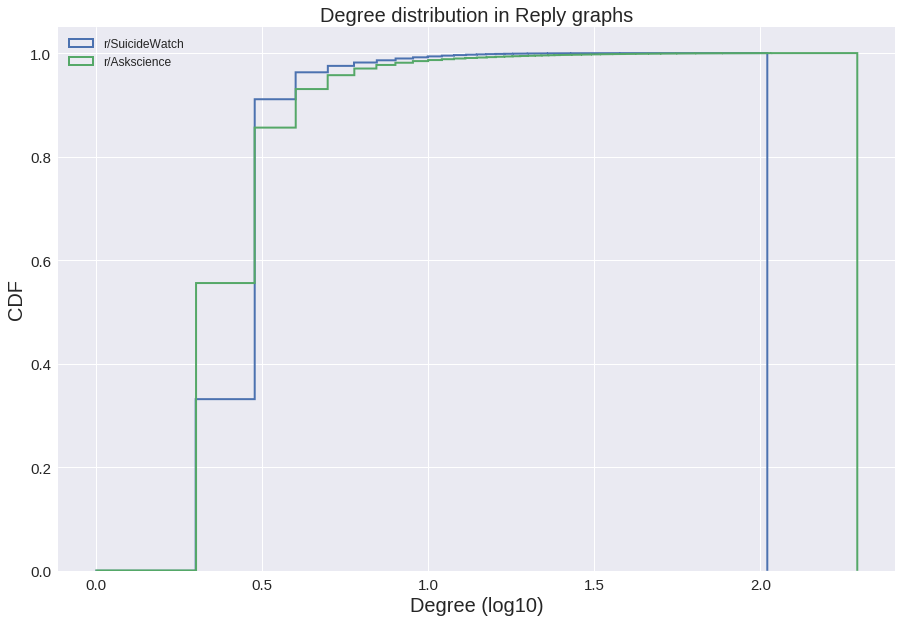

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in Reply graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/Askscience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

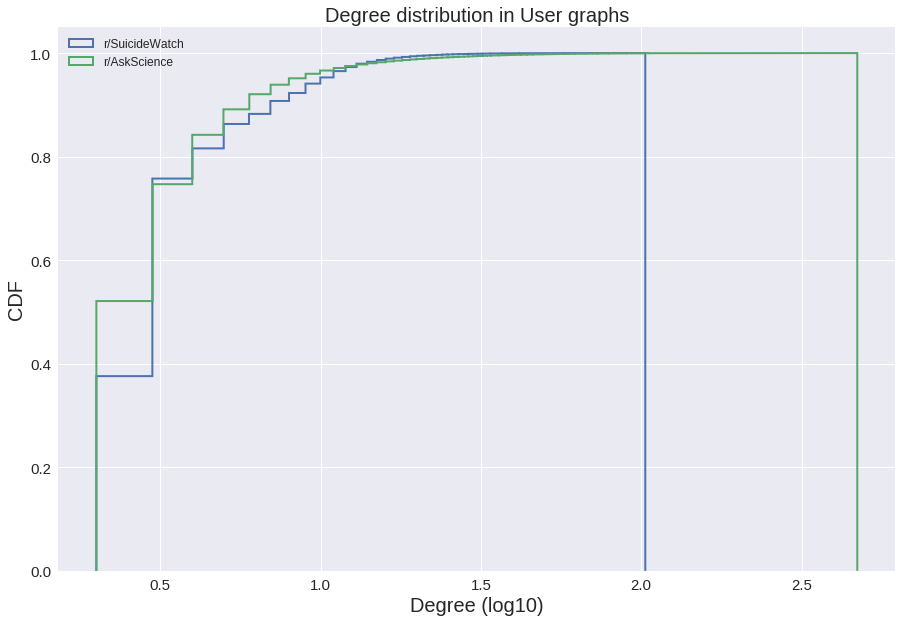

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledUgraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in User graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [59]:
print len(getDegreeDist(sampledUgraphs_SW) ), len(getDegreeDist(filteredUGraphs_BL))

stats , pvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(filteredReply_BL))
print stats , pvalue
normstats , normpvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(sampledReply_SW))
print stats/normstats, pvalue

54745 388249
12095705692.0 0.0
Samples are same size, no need to resample
0.835774645514598 0.0


In [70]:
import operator

def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
                        print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getSymmetricOPResponses(replyGraphs , opAuthors):
    conversationChains = {}
    
    for k in replyGraphs:
        g = replyGraphs[k]
        authors = nx.get_node_attributes(g,'author')
        edges = g.edges()
        conversationChains[k] = {}
        conversationChains[k]['op'] = []
        conversationChains[k]['bp'] = []
        if opAuthors[k] == '[deleted]':
            continue
        for e in nx.dfs_edges(g):
            if k not in opAuthors:
                print "OP index not found"
                continue
            if e[1] not in authors or e[0] not in authors:
                print "Edge authors not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if g.node[e[1]]['text'] == '[deleted]':
                    continue
                conversationChains[k]['op'].append(g.node[e[1]])
                conversationChains[k]['bp'].append(g.node[e[0]])
    return conversationChains
                

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
                
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
            if n not in authors:
                print "author not found" + n
                continue
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [61]:
allGraphs_SW[allGraphs_SW.keys()[1]].edges()

[(u't1_cely5zn', u't1_cely3ba'),
 (u't1_celyneb', u't1_celyhls'),
 (u't1_celzoe2', u't1_celyneb'),
 (u't1_ceslg49', u't1_cemtbqj'),
 (u't1_cemtbqj', u't1_cems1up'),
 (u't1_cely8h4', u't1_cely5zn'),
 (u't1_celyz24', u't1_celyneb'),
 (u't1_cely3ba', u't3_1uv2vj'),
 (u't1_celyhls', u't1_cely5zn'),
 (u't1_cems1up', u't1_celzoe2'),
 (u't1_cems27c', u't1_celyz24'),
 (u't1_cemzar2', u't3_1uv2vj'),
 (u't1_cemiid4', u't1_celyz24')]

In [62]:
# allGraphs_SW[allGraphs_SW.keys()[1]].node['t1_cb958j2']

In [63]:
convChainsSW = getSymmetricOPResponses(allGraphs_SW, opAuthors_SW)

Edge authors not found


In [64]:
# print convChainsSW

In [65]:
times = nx.get_node_attributes(sampledReply_SW[sampledReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1391726624.0


In [66]:
len(opAuthors_SW) , len(opAuthors_BL)

(10157, 9182)

In [71]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(sampledReply_SW,opAuthors_SW)

author not foundt3_g5rqg


In [72]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

In [73]:
len(SW_OPSentiDiff)

4901

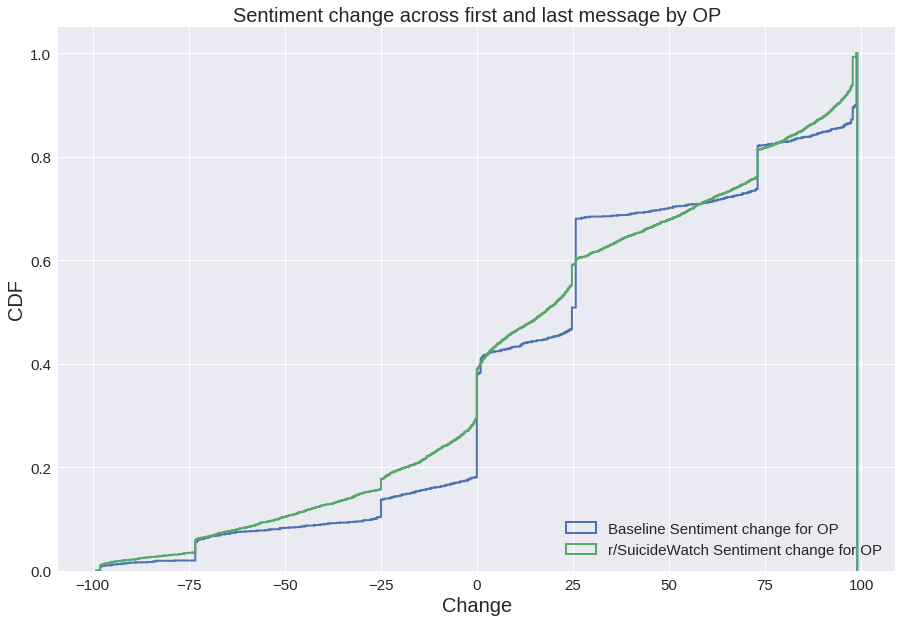

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [75]:
print len(BL_OPSentiDiff), len(SW_OPSentiDiff)

stats , pvalue = findMannWhitney(BL_OPSentiDiff , SW_OPSentiDiff)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_OPSentiDiff , BL_OPSentiDiff)
print stats/normstats, pvalue

1707 4901
1346584.5 6.153909508405816e-05
Samples are same size, no need to resample
0.9242651214939415 6.153909508405816e-05


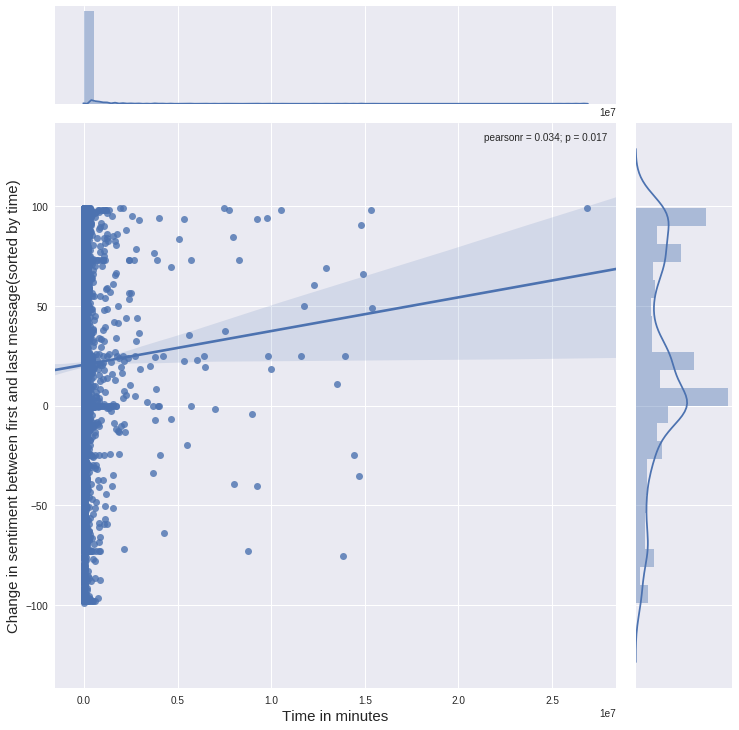

In [76]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [77]:
len(opAuthors_BL) , len(opAuthors_SW)

(9182, 10157)

In [78]:
opAuthors_SW['nfuo5']

u'other-user-name'

In [79]:
SW_timeDist = getTimeDistribution(sampledReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)

Author not found


In [80]:
SW_AllTimeDist = getAllTimeDifferences(sampledReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)

 Time not found


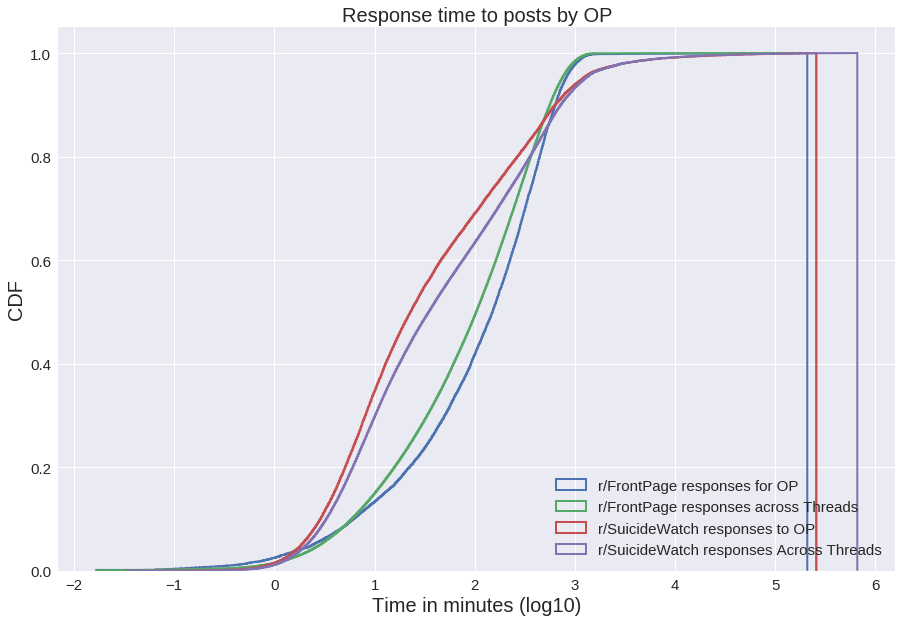

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/FrontPage responses for OP', 'r/FrontPage responses across Threads' , 'r/SuicideWatch responses to OP' , 'r/SuicideWatch responses Across Threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [83]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)


7yss00 delinea thisbusisempty
7yo1dx SubwayNerd anonym_sten
7yo1dx SubwayNerd grumpieroldman
7yo1dx SubwayNerd alexskc95
7yo99r appolo11 ClownBaby90
7ysxqg captainbeavis plokoon005
7yrhvq Your_no_no_spot Alkali13
7yqmm1 ell20 zZShortCircuitZz
7yo2ou Download19 einmeer
7yoo4f manq0 kre5en
7ysarh GundamMKII dudeyeahdude
7ylz9f SexyNuts gerry_mandering_50
7ysiay thejuiceisrunning Macaronifordays
7yn11h xGeoThumbs jodrell
7yn11h xGeoThumbs afito
7ysx2o broganox3 orphanitis
7ytgys kashluk the_visalian
7yqcxx polobwoy carlosdekansas
7yqcxx polobwoy EarthIsInOuterSpace
7yqcxx polobwoy kursdragon
7yqcxx polobwoy TheBernardMadoff
7yqcxx polobwoy I_hate_blue_cars
7yqcxx polobwoy epyon-
7yqen8 spinwell92 MG_Flanker
7yqen8 spinwell92 rainbow_defecation
7ymgwn Davometric -BennyD-
7yvm0n ahumandisaster JokeAboutNames
7yvm0n ahumandisaster memymomeddit
7yqens pixelshroom1232 ___Fish___
7yuck4 aidandavies dantestolemywife
7yvyee NatsukiGoldenHeart Destirigon
7ym5p5 Daye_04 theganjaoctopus
7ym5p5 Daye_

7yl9mu Dwaas_Bjaas grc92
7yoqo9 Koladi-Ola minousMaster
7yw37a cachorro_ guimafelipe
7yw37a cachorro_ moscamorta
7yw37a cachorro_ Kinkurono
7yw37a cachorro_ pizza_com_ketchup
7yw37a cachorro_ asiklu
7ymms4 enoughwithcats ProNasty47
7ymms4 enoughwithcats Kangar
7ymms4 enoughwithcats deggial417
6wgj6m bigdogproblems BBQNUT
7yvwlf brickfish89 thatjerkatwork
7yu20p OldGeneralCrash Proyected
7yr58b Gaydar_EMP TurryFrash
7yr58b Gaydar_EMP cuddleskunk
7yr58b Gaydar_EMP Chunkystuff
7yu3vf kaaanbay shrugnation
7yp98n c4ifford zeroscout
7yrkid KuroDima schmiegola_mcbain
7yrkil Dougiegee userfoundname
7ys450 judsonzhao StandingLenticular
7ys450 judsonzhao Holmeslice1123
7ytm74 wildglitterwolf I_Have_Nuclear_Arms
7ytm74 wildglitterwolf Ducksflow
7yni7o gifv-bot kaysixwhy
7ysgge FreedomNFireflies xThe-Legend-Killerx
7yo8l9 headsiwin-tailsulose toohigh4anal
7ynles rainsford21 Tinie_Snipah
7ymy3l My_Body_The_Mystery i_am_a_gtx1080
7ym8dy StarkSeahawk ProtoJMan
7ym8dy StarkSeahawk borninthisroom
7yvc3

7yv22h jakizely lolnopound
7ym4yr jschooltiger [deleted]
7ytx0w pm_me_tits_and_tats EconBabe
7yvfu1 leftyandzesty kapuh
7ypd7s AllisonRages Sejura
7ytdws Marabar ohhitslauraa
7yszfj Numjam -DekuScrub-
7yt90g RebbitDan ahhhlexiseve
7yo31t drmrcaptain888 Dysthymike
7yo31t drmrcaptain888 ButtsexEurope
7yo31t drmrcaptain888 beebeelion
7ys9xf remotectrl ikinone
7yq19j arevsuomlander kmevans
7yq19j arevsuomlander MELLLLLYMEL
7yq19j arevsuomlander boobsasaurusrex
7yq62k JT_Pro warpfactorseven
7yq62k JT_Pro TooShiftyForYou
7yup2e Parrotherb JaegerCoyote
7yvmoo 3NJV2 Narwhalrus101
7yuzrn Harupoppo CesarPon
7yvnbc IndependentTrucking The_Archagent
7ymsm0 doeslotsofstuff Skajnet
7yrrne LeeBregman nefastvs
7yrrne LeeBregman wise_joe
7yrrne LeeBregman eddie1975
7yw66w amatom27 Sheitposter
7yw66w amatom27 NLRD
7ysbat PhilAndTheMIDIs Seawood_
7yuo61 TopTrumpWANKER tiorzol
7yuo61 TopTrumpWANKER HadHerses
7yuo61 TopTrumpWANKER lickerofsausages
7ysom8 CommanderCornflakes Wan997
7ysjet MagFrag5891 iWaffz

7yvkzb twentylives DonOfCrumb
7yvkzb twentylives grizzly_teddy
7yvkzb twentylives Shensmobile
7yvkzb twentylives rojovelasco
7yvkzb twentylives quartz64
7yq58o Emiratendo LiquifiedBakedGood
7yq58o Emiratendo teoacosta
7yq58o Emiratendo rickychhalla
7yq58o Emiratendo DrRabbito1
7yq58o Emiratendo BenjamintheFox
7yq58o Emiratendo cblackula
7yq58o Emiratendo EthanBurnsides
7yq58o Emiratendo Wurf_Stoneborn
7yup2q sleazyduck Elliottstrange
7yw83d rational_adult briswaim
7ym23b LordNoddy rbp25
7yogli thepandaswillrule number34
7ynknf Haiku_lass mtimetraveller
7yv7cp repost_police_911 [deleted]
7ypsb0 AShadyNecromancer polyworfism
7ypsb0 AShadyNecromancer creambo2
7yufiv Someguy100305 Zioncheck
7yufiv Someguy100305 Noivoire
7yrih5 pyromaniacrobat TheOPenis
7yrih5 pyromaniacrobat WhiteNoise421
7yrih5 pyromaniacrobat pr0phetbot
7yrih5 pyromaniacrobat RemIsDaWey
7yrih5 pyromaniacrobat official-haruna
7ys0kw rocketvomit Rustytire
7yp8wx victory_road drewbage1847
7ypsby Inimbos CommenterOfComments


7yod8p matematt Lanilegend
7ypcvr GuyFromDaStore ReplyYouDidntExpect
7yn99g boulderdrop LotsoWatts
7yqgty wanyuenmei qwertypoui12
7yov6l CoronaMuralis methshin
7yov6l CoronaMuralis veryunreasonable
7ysxu8 VannyVan snakegarringer
7yv08e Teekeks BawbtheGoat
7yv08e Teekeks bgambsky
7ytjtj ageplayerboy aaareed
7yu6sm JimmyGzusChrist OnceIwasAboy
7yq6ov ZugNachPankow myownreddit
7yt4f5 Basketspank st_jazz
7yt4f5 Basketspank Logickalp
7yt4f5 Basketspank HankMardewkus
7ytb1f gone_coding cybic2
7ytb1f gone_coding WOOOOOOOOOOOOOOOOOOF
7ytb1f gone_coding LukePainter
7ytb1f gone_coding thatchocolate-guy
7ytb1f gone_coding ryanmclaughlin87
7ytb1f gone_coding thewetnoodle007
7ytdbv nearseven777 Heliosvector
7ysi1b C4Edgez vintagetennis
7yqboe anklebreaker21 strandedinalimo
7yqn01 yaddablahetc bluebledthesea
7yrp6g MillenniumBeach TheRadBaron
7yv4vq madonna-boy BuilttoTilt
7yp8ow richardjohnsonthy ExcalibersBlade
7yolas GiganticCactopus 1_point_21_gigawatts
7yv70j snowbreeze123 vishalgulia
7yt56w Lo

7ypklb Imgettingscrewed Rj-24
7yuufm Belmagick Abstract_Ginger
7yuufm Belmagick GoddessKalisha
7yr6zm KCBassCadet Mayjaplaya
7yqgjp PM_Me_MonikaXSayori DarkSlayer415
7yqgjp PM_Me_MonikaXSayori TheRealAlexNash
7yot27 PunkieBooty Blynkx
7yvg3x ThatJackUp Dragons-With-Tits
7yt5x1 alex74475 Joemetheus
7yquc5 dreadpirater unknownyoyo
7ymbu1 Oceloctopus 64682
7yqcnp Coleatemycereal ilovetosnowski
7ypo7x Rcfan6387 -GLaDOS
7ytuve IceColdKool Shoop9313
7ytnba Synchos TrueKingOfDenmark
7yp7mn mpm2135 Damn_Dog_Inappropes
7ytsdr Dog-boy procraftstination
7ym6f8 if_it_fits_Sit Your_Worship
7ym6f8 if_it_fits_Sit princessleiana
7yvmf8 NovaBlancke Heliocentrix
7ymylr postonrddt hel112570
7ypu70 nousernameisleftt bethanyjane77
7yvvkf doggyfishbird logicalnoise
7yvvkf doggyfishbird Unfiltered_Soul
7ysuy4 nyquill81 rachellosaurus
7yrodn OBAFGKM17 dukeroni
7yrodn OBAFGKM17 SauceLug
7yqyxk indefinitallie jellicents
7yqyxk indefinitallie itssnowinggg
7yv2sc Yavuz_Selim thespiritofantigone
7yv2sc Yavuz_Selim

7ysnvt TommBomBadil RepublicanKindOf
7ysnvt TommBomBadil losthours
7ysnvt TommBomBadil ZeroCascadian
7yq3ju SwannyWilkinson NativeLobo
7ynll5 Jeremy-from-twitter TommyG3nTz
7yp91p Babyfart_McGeezacks KJ6BWB
7ytpe5 prodiG johnbaldwin85
7yuqwy thatdani DaveIsMyName-
7yuqwy thatdani AMBRA_AMBRA
7yuqwy thatdani 1SaBy
7yuqwy thatdani derawin07
7yuqwy thatdani Giggyjig
7ymw7v mbivalence bazingarbage
7ymw7v mbivalence Whatthefuckamisaying
7ymw7v mbivalence DinoPilot
7yuisc EinsteinsAura [deleted]
7ys6oi Synchronyme Koncret
7ymrcf ben_wuz_hear Taffythecat
7yprnc BifocalComb TrumpsRussianHacker
7yr1p8 Cicada1205 ThotDestroyer420
7yvxp6 kevinfunk77 DropTheTubbs
7yumo9 Quedreneese [deleted]
7yvl32 thundersquirt lagoon83
7yqdl3 floridawhiteguy Twosuperdorks
7yt376 Tupac-is-al1ve Ur_X
7yuunn ChopsMagee NickDrummer
7ys8bg Kiranmathew261 Akustics
7ynmgz S13daydream ifmacdo
7yr6rv shootingforthemoon willtwerkf0rfood
7yrvnz SocialismEcksDee PaperMartin
7ys6x4 canyoupasstheranch XRogueThreeX
7yseh5 TooG

7yrukv MichiganDrummer92 Jasper_Carnivore
7yr70q Ogooglebar86 rukenpluk
7yt0qz MainTeraBaap Dance_Solo
7yvapo chirkee DestroyerOfShitcoins
7yu8ze antiphlips Overlord_Orange
7yqssu 09-11-2001 RollingRock64
7yttne Skvli DanyulSnow
7ypntt MrVoila DavyB
7yotyc Toronto_man Jaiyk79
7yttn8 Sjsjjdkdjsjdkskssj incrediblejames
7yuz3h TheManWhoPanders [deleted]
7yo3o5 DoctorWaluigiTime TrevionTX
7yrmcf rdtshaw Wpieter
7yuzh7 hellohealthyliving_ MidnightMaple91
7vr1ae DESTROYER_OF_RECTUMS kristopho
7yu5rs JonGinty thefloatingpoint
7yn4bb KimHorcher princessrowana
7yo3oe Ghost_out_of_Box labyrinthos016
7ys14i ItsKipz gobbler-gonna-gobble
7ys14i ItsKipz isync91
7yoebd loudpiss [deleted]
7yoebd loudpiss NeckBeardtheTroll
7yoebd loudpiss ToxicPickleee
7yoebd loudpiss stylesm11
7yvor3 esylvia JohnnyEnzyme
7yow78 ohfugit natethegreatt1
7yow71 austinography gsirris
7yt0ns freddiesan KeiRizaru
7yors2 AdventureSparkles ChefSuperFune
7yux5e Infinite_Return calbat297
7yux5e Infinite_Return wiki-1000
7ynezj k

In [84]:
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(sampledUgraphs_SW,opAuthors_SW)

fjatc drunk_otter dead_by_saturday
1x6boy Altruizzy throwawayacct424
97akw Faustyna [deleted]
97akw Faustyna PossiblePerson
s79sc logospogos284 fuck_usernames123
2tjz9s yolomgwtf BearDidIt
b0mvj lurkergirl itisover
ci9lz Agnostix dontwannabehere
24gto5 Soletrador youcaughtthelight
29en0c LostInAPicture Ingvarkarlsson
29en0c LostInAPicture throwawaybcirl
37zjrf the_wheaty pathfinder89
1cz1sd RemFrank KimmyJongJong
2wo3jj neminemexcusat throwitbitch1
16hiex chooby3000 griffin_desantos
e1hjc drqxx [deleted]
osxp1 no1one bleepitybleep
osxp1 no1one [deleted]
osxp1 no1one skekze
2hip0u Chaos_apple Missing_love
xwu8q blondin 1800HEYGTFO
1dqizr ta001001 buba_fett
1jg4bt blipsycat dudelikeshismusic
1jg4bt blipsycat [deleted]
e6utj dswis iwanttostopfighting
kou1f Thesel [deleted]
m3pdi Danaxeil randomstranger123
m3pdi Danaxeil sacca7
m3pdi Danaxeil samesinkingboat
145npe raincloud12345 Dont_blink_angel
wafoy hopelessthrowaway99 [deleted]
wafoy hopelessthrowaway99 TonyDiGerolamo
dr257 SoCalDan wf

2v93mx chap41 asdfhillary
2v93mx chap41 Putin_inyoFace
291rgl ivelostcount Troic
mm6qt fallingwithoutsafety hugsforeveryone
mm6qt fallingwithoutsafety MissRambeau
mm6qt fallingwithoutsafety DiableJambe
3a8pwh Sacheverell_ gcdream
19uwzt Blucatt icanusethis
19uwzt Blucatt [deleted]
19uwzt Blucatt Raymond890
2bra4y vaginaainthandicap [deleted]
2bra4y vaginaainthandicap ctrl_alt_believe
2om8vt ja18960 walktotheedgeoflife
1hex8t stripedytiger sssyyynnn
13kjee Twistntie [deleted]
13kjee Twistntie return-of-the-mac
13kjee Twistntie MrsVentura83
13kjee Twistntie Holmesymcgee
13kjee Twistntie sotiredofdarkness77
14l2np iloveyousomuchgaycow [deleted]
14l2np iloveyousomuchgaycow lger2010
14l2np iloveyousomuchgaycow Durvid
lulak Psy-Kosh Imsecretlyfapping
1v5v0s tomtom24ever onethirteenforteen
1rognw whippogirl16 [deleted]
1rognw whippogirl16 Delixcroix
1rognw whippogirl16 myowmyow
1rognw whippogirl16 XisanXbeforeitsakiss
2ds6pr sw1928 Queen_of_France69
2kztjj journeyman369 ar-nimruzin
2kztjj jou

296tsd wtfrickss [deleted]
296tsd wtfrickss theks
20092u tomorrowistomato bktolife
20092u tomorrowistomato trianna-uk
20092u tomorrowistomato [deleted]
20092u tomorrowistomato tomboyphil
39jtwy heartbreak-gameover lostandalone1995
1gxaxr roses269 BosmanJ
3e042x Bellerophon00 [deleted]
3e042x Bellerophon00 cokecaine
3e042x Bellerophon00 suffocatingly
14xviz Valge Myworldyouliveinit
14xviz Valge NinjaDiscoJesus
1ju931 WhatsLeftOfUs omgitssorr
1tujbh InitiumNovum Seancoolie01
2t5528 anon34576 Letstalkaboutit22
2t5528 anon34576 [deleted]
2t5528 anon34576 Total_Carnage
2t5528 anon34576 Ferdinand33
2t5528 anon34576 horned1x
1samek Christianmustang potatetots
k4t6h TheFarm abandonedandsad
2fgwev Throwaway47912 Justvotin
1bdczp Dickthelurker [deleted]
1bdczp Dickthelurker darklight27
2y9dc6 Rawbban carboncopyalt1
2y9dc6 Rawbban TokesMcGanja
2y9dc6 Rawbban BoochClawson
2y9dc6 Rawbban Tommy_Taylor_Lives
2tdns5 HippieLove98 [deleted]
2tdns5 HippieLove98 jagged_steel
2tdns5 HippieLove98 Z1224466
2

gftl6 emabunny [deleted]
gftl6 emabunny foobarr
gftl6 emabunny scores12th
gftl6 emabunny EpicCyndaquil
zhwcv blondin theypullyouunder
1nu02m pricklypete RatedMforPanda
2w1cdr Brainwash_TV littleoldlilli
1vfg7d lambyfrasspeppertass [deleted]
28pw81 418156 Mutjny
28pw81 418156 sayiph
1dgb5y buba_fett throw__away2
9pz8j donnie0darko0 XLII
9pz8j donnie0darko0 nihilo503
pdhb9 jwhispersc suicideatsix
3g4za4 SuicidalThrowaway___ BigDaddy_Delta
3g4za4 SuicidalThrowaway___ [deleted]
i9ug4 eyecite throwaway997348
2158eb 88jumper88 Tlk2ThePost
2158eb 88jumper88 tarantulaguy
fuzjl InappropriateQuote landlordpaleale
39hwu1 mrbluesky7777 BubbleRabbit
2oubkm Yumeijin [deleted]
2oubkm Yumeijin iiiitsjess
2oubkm Yumeijin Fred_Flintstone
3dvsxx MrMajorMajorMajor neverfading09
2c0tuv drmedano bellagioia
29yftf thisisreallyrandom LaLuna8
29yftf thisisreallyrandom [deleted]
29yftf thisisreallyrandom NoremacNotRedBlue
29yftf thisisreallyrandom hornless_unicorn_
1sua14 circinia Throw_away0933
17h9yw BlackUni

pq1lr OpusMioda [deleted]
pq1lr OpusMioda drivebybodypierce-
161naq Holder_of_bacon Terra277
1xye51 sofar1776 Dex1423
21yvol throwawaymylife4her cantdoitanymore94
356u91 xaniam Valserker
1qln9p surelyhope fingersInTheAirFuckY
2mnjns on2usocom Awaywethrow112
2wfb9i randNick_Parantheses [deleted]
2wfb9i randNick_Parantheses WukongTuStrong
2mgrmh SugarBunny5 SocialEnigma
yyyjs Filmy92 senorchang1414
jsek8 Psy-Kosh neubs
36861q captainstan [deleted]
36861q captainstan ZachLNR
36861q captainstan TwopennyQuasar
36861q captainstan Demons4life
285sz7 Lyd234234 [deleted]
285sz7 Lyd234234 throwawaypornjobs
285sz7 Lyd234234 DynamicCast
3gu6qa Thats_FrillyPants [deleted]
3gu6qa Thats_FrillyPants wedium
3gu6qa Thats_FrillyPants iyzie
3gu6qa Thats_FrillyPants Butjam
3gu6qa Thats_FrillyPants Roxanneredfern
1wqmzp OffOnARocketShip Heenicks_
1wqmzp OffOnARocketShip [deleted]
2zpyag arenotme your_average_nerd
3gbgkz Tubaka [deleted]
1lzzdm 4_years_later illinmorewaysthanone
1tpzr8 ClaranceWhirly vodkach

w2cen Rysona icantbeoriginal
2mjnyy MaddieRose13 fuck_your_bs
n9zp6 zdayatk bleepitybleep
n9zp6 zdayatk [deleted]
2ntaty Sheesha1992 someaccount3008
2ff1ug Ineedhelpthrowaway23 Beyond_the_shadows
2ff1ug Ineedhelpthrowaway23 ArcticTerrapin
2ff1ug Ineedhelpthrowaway23 TheMoonshiner
2ff1ug Ineedhelpthrowaway23 misstiddeR
2ff1ug Ineedhelpthrowaway23 PM_your_hugs
14nec4 omnipotant noclaptrapzone
31mnbg EndlesslySleeping EllietheWalrus
31mnbg EndlesslySleeping arenotme
3ba6kr kynrael selonnan
2ptxd9 LightOneCandle trashyaccount3453
36hgsu hingaginger [deleted]
38oj38 the_wheaty bluecombats
38oj38 the_wheaty [deleted]
2ts13u EllietheWalrus throwawaysoul8629
2nwj8n themaskedpumpkin shadowlurker_j
1hf0bu Ladylife11 elehpahtnchair
1p861j mmindfulness Ehalon
1p861j mmindfulness TreadLightlyBitch
zcj7r 3dogs3catsandahedgeh dimasok
1c3l76 Suicide__Watcher looking2disappear
2sq8z4 ja18960 11553366
iw1io vespavirgin bluecastle
km10b acepincter generic_nerd
cgx6i johncardan stilesjp
cgx6i johncardan S

1sip0m penaltyflag OneLegAtATime
1sip0m penaltyflag [deleted]
2sqrg1 BlackRoseMLove EllietheWalrus
2sqrg1 BlackRoseMLove Touristupdatenola
2sqrg1 BlackRoseMLove infinitesighs
1p92as Broken_Hyren notkillingmyself
7v8fm nobodyreally [deleted]
7v8fm nobodyreally Barnlinger
7v8fm nobodyreally defrost
7v8fm nobodyreally ZuG
7v8fm nobodyreally Orangutan
7v8fm nobodyreally Ortus
h58t6 j8ner rememberthatkid
lwnq5 PseudoFake JoJoMunny
dd2ln littlelady15 slowlybutmostlikely
1usm3r logan38a confessi
3gadrb Tubaka shy_snail
2e4r3e taufish Bad-Faith
26p27m BabyScreams Bookmaster_Quest
gvtrs maloewen EggzOverEazy
2ifdlb the_fail_whale electroshock-blues
f1gup itislikeineverwas [deleted]
f1gup itislikeineverwas skyqween
f1gup itislikeineverwas vrava
f1gup itislikeineverwas JayneAmanda
f1gup itislikeineverwas aenea
f1gup itislikeineverwas BrainsAreCool
f1gup itislikeineverwas pwl_sw
3gmdw7 manaze112 Noreyada
3hh736 Wheat-Thins [deleted]
2q312n myrealitie [deleted]
rsj5s TheEndMyFriend triforce88
rsj5s

h0jmv jarlus [deleted]
h0jmv jarlus depressedseniorhs
1btvc2 XXbloodxgoreXX [deleted]
1btvc2 XXbloodxgoreXX rizzie_
z3qys isothien LegoStaircase
356jzt bozw Skraitchen
2i43og yagonnausethrowaway [deleted]
bj5de dude2k5 thrownironoose
t3xsf everybodydies cmspi
24hvfa osych charon8
24hvfa osych banjjj
gd78b masuowdkm Lugburz5
gd78b masuowdkm AnnMarys
1rs6nu ThrowawayThatBear laurenshapiro
1rs6nu ThrowawayThatBear circinia
1rs6nu ThrowawayThatBear kurtcobainshubby
gcvj6 SQLwitch ObviouslyThrowAwayFE
1bw7s3 40056179 fakeaccount4here
8hi7t Jpool [deleted]
8hi7t Jpool topsul
8hi7t Jpool bluegerm
3ionhz deqs112 [deleted]
3ionhz deqs112 Marc_Being_Redic
3ionhz deqs112 jonk0731
3dptt1 volatile_dream [deleted]
3dptt1 volatile_dream Greenwallaballa
uo679 californiabound throwaway_1123581321
1cj9y6 techthrowaway77 [deleted]
1cj9y6 techthrowaway77 lord_of_vader
1d9d1j Bcipnag Bleevl
1d9d1j Bcipnag Tlk2ThePost
358h7w PM_YOUR_LIFE_STORY_ spaghettitosser
2gzb4b Tiberius4 Idflipthatforadollar
32h0sj th

34u9vz BacontheGunslinger Recyclebinhero
g695t valis5 justanotherswthrow
dlx1n Kalynada [deleted]
2bu6ce taufish ThrowableAO
smfl4 whatwhatwhat82 lolingroflcopter
smfl4 whatwhatwhat82 ravia
smfl4 whatwhatwhat82 [deleted]
smfl4 whatwhatwhat82 my_name_is_joey
3ga7ca alltoo JordThePord
3ga7ca alltoo the-last-whale
2zlkbm JohnMalkovitchLover [deleted]
2akgjc Izzy-E sylveon586
8j4vc nangpo bleepitybleep
8j4vc nangpo [deleted]
8j4vc nangpo aenea
10l8qs smatty320 undercurrents
10l8qs smatty320 Sypherin
2ynmvg ollee rebelaessedai
1fag59 justforthisss7 [deleted]
1fag59 justforthisss7 polkadotgirl
1fag59 justforthisss7 crazymonkeyninja
1fag59 justforthisss7 spaessken
1wif15 DopedWolf Inkysin
39zi5i _Raichu_A_Love_Song_ colon_leftBracket
27nyll thereverend9 throwaway384829
1rrmq3 WellSpoken appelmand
30dbud Vedney Failureandfear
35hzdg Del_boytrotter hornless_unicorn_
35hzdg Del_boytrotter SwampGentleman
onz6k Jerbatim icantkeepgoing
1idgyy RemFrank teathatsgreen
1idgyy RemFrank [deleted]
1idgyy 

1mau0z imsotiredguys ZoeBlade
1mau0z imsotiredguys UnitN8
39fpdq beardeddragonborn NOT_MY_R3AL_ACCOUNT
106g41 Imtheone457 Dark_Confessions
n92n6 SkeletorSlim [deleted]
n92n6 SkeletorSlim Buttercup50
n92n6 SkeletorSlim Ichbinzwei
n92n6 SkeletorSlim Copo55
n92n6 SkeletorSlim My_Revelation
1tbyp5 biggreddy rghhhrrg
200q5b Atruethinker Pointlessly
h3mo1 thejungleisdark [deleted]
h3mo1 thejungleisdark dumbechoingthedumb
h3mo1 thejungleisdark farllen
1tvdc4 idontknowhowanymore [deleted]
1tvdc4 idontknowhowanymore drqxx
1tvdc4 idontknowhowanymore ngp8
1qimd5 obachuka [deleted]
35mzwn derrstorm baltimore_mcnulty
8j0u5 S2S2S2S2S2 [deleted]
gm1ov SicSemperHumanus EnjoyMyDownvote
27x590 chrisjuan69 TheFightGoes0n
27x590 chrisjuan69 throawaythro
2h2jit Help-M [deleted]
2ftmt3 tarantulaguy ididsomethingdumb331
9h4fd qgyh2 DoppelAccount
rgtxu BrandoTheNinjaMaster MassivelyDepressed
3ezp7s karanrawat [deleted]
2id87h awake4o4 anonni-mus
g3n37 GirlsDontGoCrazy samhasacatandhands
g3n37 GirlsDontGoCrazy

1mcznn InYourUterus Hopeless_Bunion
2imxi1 Tabbers16 MatteGray
2h6vvj FreshyQ walnut20
2nu9db Unoiseau stupid-cat
39hi28 FartyMcFartButts simon_94
1l8tlg Throwaway78965412 [deleted]
2r1qw4 EllietheWalrus [deleted]
2di5c2 123throwaway890 yellowbug234
2di5c2 123throwaway890 suckseggs
2di5c2 123throwaway890 SESender
14j4i8 throwaway00892 [deleted]
14j4i8 throwaway00892 djEdible
14j4i8 throwaway00892 Chorizzo
14j4i8 throwaway00892 T-101xPiroxyne
1fpm41 EmberTiger [deleted]
1wuzv9 TiredPaedo X-23
dshj2 blondin comein-throwaway
1slxl5 surelyhope pbnv
2gdpeh ineedhelpplease5 [deleted]
2ev51k msltoe LastChance172014
fwwv8 spoonjarjarspoon Psy-Kosh
fwwv8 spoonjarjarspoon DKSchrutte
1782mz Looneyhorizon [deleted]
2mzyeq RedEnder [deleted]
1p3hmm mercecunningham BloodyFaceKillah
20l0yk adanielpsych YaelCohen
j19zn ThrowAway55123 zephlinn
2nn1jt LtBenben thisisaburnaccount12
1tnpz3 Hiro45 unbelievablyfucked
2gezqi Throwawaytyuio Havasufalls
2lsyum desperateforyourhelp Dazurean
2lsyum desperatefory

371do8 boyfriendzone Alonminatti
z9kwb omnipotant skinpick
2fjnzw kuresto throwaway93893
mlx71 MissRambeau r3d123
20dc8t Maniaxe613 Tortiekitty
20dc8t Maniaxe613 sofar1776
nihw4 Tsopperi tiredofusernames
28d2sj HuskyWolfy Del_boytrotter
ignkt throwaway985990 [deleted]
ignkt throwaway985990 suzepie
ignkt throwaway985990 Iheartburritos
ignkt throwaway985990 SQLwitch
ignkt throwaway985990 jmnugent
ignkt throwaway985990 1nsider
ignkt throwaway985990 BridgetteBane
2aqwhp bainesy3 SantinoRice
1rguqf Emptyglassofwhiskey [deleted]
1rguqf Emptyglassofwhiskey CircularLogic
1rguqf Emptyglassofwhiskey sofar1776
ail5t db_bondy RoundSparrow
ail5t db_bondy aenea
2kx7fz tigerpie9982 PeepBunny
2gqkuj Wistariac [deleted]
23vqqx ThisMightBeThrowaway [deleted]
23vqqx ThisMightBeThrowaway sbw2012
2woshg hate_life12 sorc
8wa61 prophecy [deleted]
8wa61 prophecy aenea
3dsvl5 ZanderGarner [deleted]
3dsvl5 ZanderGarner bbb78
qyxgb RoyalBlueToast agross717
qyxgb RoyalBlueToast DavidByron
3fjynq bostoncarpetbagge

35q8p5 xtimebombxx GunsHaveADeathWish
if6bx shastacola678 exit_now
1zbzdi Dantien [deleted]
1otmf0 yahomiesmokey Uncalm_Mind
26ysgr brightsky2 i_9
hca4s deep_sea2 idontwantobefriends
fll5b makerdyer [deleted]
fll5b makerdyer yuri_releases
2q6siw _ta ja18960
2q6siw _ta hornless_unicorn_
2q6siw _ta Da_Black_Jesus
cit0i Kanilas K-Bar
20i3or basementdwellersdie ThrowAwayHereDuh
17ntzw DrowningEmbers DangerChips
17ntzw DrowningEmbers Agnon
17ntzw DrowningEmbers The_Wily_Curmudgeon
3herp7 goldgibbon Hkyw2
11duec Miki_Miura blackholeOfSadness1
19iji1 Ramsayy09 IamANidiot21
xxxa1 JakalDX IgottagoTT
xxxa1 JakalDX [deleted]
xxxa1 JakalDX DarthContinent
xxxa1 JakalDX mrspaysonshat
xxxa1 JakalDX NinjaDiscoJesus
39oetn airjord222 [deleted]
39oetn airjord222 LuxxB28
39oetn airjord222 bluebreeze52
39oetn airjord222 cyathea
39oetn airjord222 YCantIHoldThisKarma
9kmjo applextrent toasttoasttoast
1sz8up Freeman001 Ivefuckedup15
2l5mc7 Twyll SelfH8n
22dk65 Pilat_Israel outlaw_rambler
1gvh88 OPDidntDelive

j8zvf Sysiphuslove clovenail
1iinz4 facepalm247 relathrowawayyy
op2th athirdterriblething bleepitybleep
op2th athirdterriblething [deleted]
op2th athirdterriblething iamweezill
lno7o Always_Sunny gottalovethatchoco
k55dt youarealwaysthereMD Roombafollower
203z46 VocabularyTeacher Olivesophia
1v6mzo pipe1monkey1pen jyyack
h72le metal-head gump8191
1egshf 111on1r11z xxxnsfw
qikzl Ihadacow icanttakeit28
9g560 astroconcious [deleted]
9g560 astroconcious qgyh2
9g560 astroconcious RoundSparrow
9g560 astroconcious aenea
2b7mku Izzy-E duhfri
vjilp freesey throwaway261985
pvaiy King_of_the_flies [deleted]
pvaiy King_of_the_flies Coldmode
pvaiy King_of_the_flies Hlidarendi
pvaiy King_of_the_flies kefka5150
2k7mhn sciencegod Scuzby
35gjba qwertyu12345678 red_threat
35gjba qwertyu12345678 [deleted]
35gjba qwertyu12345678 we_will_be_fine
35gjba qwertyu12345678 amillionmilesawaaay
35gjba qwertyu12345678 Esotericas
2ytdhg TwopennyQuasar FuryKnight
3f3fck KotSTis [deleted]
1tioit SleepyTree97 Dudemanc

2iwwe9 Imaginr wtfgiraffe18
2iwwe9 Imaginr obxtany
2iwwe9 Imaginr lucky7strikes
2iwwe9 Imaginr thefightclubber
37fp2d anachromatic [deleted]
37fp2d anachromatic worksafemonkey
37fp2d anachromatic ykks
u03ds KuroAi koshercowboy
u03ds KuroAi purplemantis
u03ds KuroAi flyingfalcon12
u03ds KuroAi CoolGuySean
2qoo9g pixel_dust Taintedgod
hrdo9 acluebbert Lurkertothemax
2imxep Pancake189 TheDisconnect777
14rwb0 ofriceandhens TonyDiGerolamo
14rwb0 ofriceandhens Fullmoondragon
d6ssg SicSemperHumanus throwoutgirl
2wrhyy balloon99 hollowpoint0
1yeuzs prosvade Wromo
1yeuzs prosvade khloead
d7lb8 ghostgrey [deleted]
d7lb8 ghostgrey pururin
d7lb8 ghostgrey jmk4422
2lfuz9 lIIIIIIlIlIlIIIIIIl 0n_the_bright_side
2lfuz9 lIIIIIIlIlIlIIIIIIl ja18960
2lfuz9 lIIIIIIlIlIlIIIIIIl whis
8l600 emulate bleepitybleep
8l600 emulate defrost
8l600 emulate [deleted]
1vqqfx Broken_Hyren Lonelygamergurl
1dsn9i TonyDiGerolamo test0231
18agev Fighting2live Maffrew
23oxt4 kati_theman_murph heksheheisndj
1gft71 MeNoSpeakAm

31bcy6 Aelwenna tossmeintrash
31bcy6 Aelwenna stereosteam
sgi3e tomjen throwaway51691721114
1to27p luckdomain wontyouthrowitaway
1hhz2b El_Giganto [deleted]
1hhz2b El_Giganto nanner4567
1hhz2b El_Giganto ATCaver
24hkir Del_boytrotter ventimhere
2ntbqt nonamesleft94731 throwaway87843556
1c56oy MoonCub [deleted]
1c56oy MoonCub nabil1030
1c56oy MoonCub whatdowedoyouguys
1335vf debcsr12 WM1130
35flze TacoFace65 [deleted]
35flze TacoFace65 Terex80
zwjaa throwaway12094 romneycheney
zwjaa throwaway12094 adventurefuntime
zwjaa throwaway12094 onlythedreamers
zwjaa throwaway12094 telliebobo
20jf93 SteelWyvern ivegivenupallhopee
1qa3wd Kardlonoc AhabAway
394hvn Vongeo Morte_
394hvn Vongeo ictbob
15rgrk Retarded_ VikingChaser
2zvs1f WolvenHelm 4398544239597
11jaoe thisispiper KITTEN-CAT
i584b stripesandplaid yourfriendlyhuman
i584b stripesandplaid gingerkitteh
i584b stripesandplaid Kalynada
i584b stripesandplaid stayfuckingpositive
i584b stripesandplaid skekze
i584b stripesandplaid [deleted]
3hm9p

dltjr bobimbobbit LuckyBdx4
dltjr bobimbobbit [deleted]
dltjr bobimbobbit thesouthpaw
dltjr bobimbobbit levishand
dltjr bobimbobbit MercurialMadnessMan
e8ptd SQLwitch 231231333
30o43o _throwaway9273 [deleted]
30o43o _throwaway9273 whateveritsme
30o43o _throwaway9273 birdiesss
1unq5g I__Care Kaystar90
2pncd1 LivingInFearPTSDgirl lovinglily
2pncd1 LivingInFearPTSDgirl londonpa
lvuqx TreePusher CompulsivelyCalm
njq9m bayingofthehound ThoughtlessThinking
njq9m bayingofthehound [deleted]
yjl00 Digi2112 pleaseneedadvicefast
2m1tz1 capplay phtbockaahtttirtkol
15pu1s Assholereplies notwhatiheard
2pr9sw A_Dissident_Is_Here thegreatestmemeofall
39n8bc Nibbles110 KappaWilson
1vphms Throwawayinventory [deleted]
1vphms Throwawayinventory nofap2015
1vphms Throwawayinventory sneagle
1mxlih TooMuchOptimism Countitalllost
emb1f kipperson DoubleX
19a5ns purplesummer NewYurk
19a5ns purplesummer cliffsofinsanity
19a5ns purplesummer dermo529
2irhr6 HidekiMotozua MrSexysPizza
176cpm Jadedandconfused endless

ek3py ohDontMindMe dxcotre
1ho8bl twelch24 8745215635
1hpyqq RivenX TheWitsEnd
3fn1ks deine-freundin [deleted]
b8w43 justlikethecrowd whynottry
b8w43 justlikethecrowd bluegerm
b8w43 justlikethecrowd SicSemperHumanus
e5vvo southernbrew08 throwaway2893710
2bdioz walk_through_this replambe
14z4jw Kinglouie throwaway51691721114
dzc6l leftside TealEel
1v9op9 Didnt_die_yet NappyWarrior
1v9op9 Didnt_die_yet bibabanaan
ogwbs weeeee_plonk dimbledorp
g5rs5 Faustyna missforeverhurting
xp3gg Quixos little_raindrop
2ygh6y OrcishMonk ToFartWithoutFear
q0wul alexthelateowl suddenlyNinjas
2bn0mi LestatRequiernam roast_spud
2bn0mi LestatRequiernam SpritLuder
9vpc1 LincolnHighwater viborg
9vpc1 LincolnHighwater mind_blown
qw98o Thinks_Like_A_Man Ribgf
24b487 Steven_Stallone WhyBother21
2towm2 Vox_Silentii Princeofdreams
2towm2 Vox_Silentii BearDidIt
2towm2 Vox_Silentii Buffy82
272l7k drBOX lovelybunchofbananas
dr2wr aenea BetterOffBuried
21yo8l throwawaymylife4her hippolanguage9
2di54g chrissorrenson em

1iipcm A_Town_Without_Pity woensdag333
1iipcm A_Town_Without_Pity mightyUSwarlord
xyzrf 8912 thahulk
xyzrf 8912 [deleted]
xyzrf 8912 amputeenager
1x6no5 s0u7th13f silas_tompkin_comber
1x6no5 s0u7th13f markth_wi
1x6no5 s0u7th13f beardedwarrior85
1x6no5 s0u7th13f delicoussandwich
1ub1l1 Jayke1981 [deleted]
pse5h here_to_understand b3nthrowaway
2s2unt saganist91 tessrn
38axzk henrymbh94 ballast_nt
38axzk henrymbh94 Enterart
18mnu4 AllHailDoug Denaturalize
18mnu4 AllHailDoug [deleted]
18mnu4 AllHailDoug Ladybug_loves
18mnu4 AllHailDoug JustLongEnoughToFit
2n3lm3 FuckTruck 617171771
xvaqx illbefine KidRose
2pujcc Epicallytossed UncivilGiver
8msf1 gayguy [deleted]
8msf1 gayguy kanuk876
8msf1 gayguy MerEtAl
3ily60 Adokasteel centurion_celery
er8ie ihaveacalculator JugglezMcGavin
pgytv SQLwitch neonpinkplastic
pgytv SQLwitch everything_is_meh
1u02ae Illuminate_Obliviate KTcube
1u02ae Illuminate_Obliviate The_Quirky_Mariner
1u02ae Illuminate_Obliviate throwaway_away_away
1l9ywm opl890 Terranrp2

116l13 onlyalittlelonger lobsterandi
116l13 onlyalittlelonger Shadowsdogs
116l13 onlyalittlelonger [deleted]
116l13 onlyalittlelonger omnipotant
116l13 onlyalittlelonger Estehbahn
ehdc0 caldera15 jessichurts
1zxewq Kremox SippantheSwede
d8461 lemony [deleted]
16wy5u buccie EmptyBehindACurtain
lw5l8 justfuckingthink neverendingpain
hrp0m weareyourfamily itsnotdelivery
1lylmh chupacabra_whiskey magentaThrowaway
qqp4x pkbooo icecream2013
rbbxd marquisamon snowden_
2xk74e rareas Mudlily
2fqvj5 Vlade80 wranglingwithlife
esy9g seegull throwinitaway0384
3bqrs3 Terex80 [deleted]
1ewp8d dobtoronto LeftoNhahe2
2ii6ql Hopefulfixer HidekiMotozua
lp4p2 poltug BoomtownMadman
lp4p2 poltug broomhilda
lp4p2 poltug Always_Sunny
3ck7wk suicidethroawayy LilithAjit
1cdn9q compslitsconscious Manraynor
1cdn9q compslitsconscious eccentrickd
2nyaos the_dark_half [deleted]
17c8sc serenityclearwater jkizzleEe420
17c8sc serenityclearwater ARMIGER1
17c8sc serenityclearwater lauralikescake
1wfuae scaredoftigers und

In [85]:
SW_messageParti_all , SW_userParti_all, SW_bpusers_all = getSymmetricBehaviour(userGraphs_SW,opAuthors_SW)

vj5co [deleted] zombiemeds
fjatc drunk_otter dead_by_saturday
1x6boy Altruizzy throwawayacct424
97akw Faustyna [deleted]
97akw Faustyna PossiblePerson
3ci391 [deleted] peanutpeepz
s79sc logospogos284 fuck_usernames123
2tjz9s yolomgwtf BearDidIt
b0mvj lurkergirl itisover
ci9lz Agnostix dontwannabehere
24gto5 Soletrador youcaughtthelight
29en0c LostInAPicture Ingvarkarlsson
29en0c LostInAPicture throwawaybcirl
37zjrf the_wheaty pathfinder89
1cz1sd RemFrank KimmyJongJong
2wo3jj neminemexcusat throwitbitch1
1h1vqu [deleted] nopointnow
1h1vqu [deleted] rainbowtwinkies
16hiex chooby3000 griffin_desantos
e1hjc drqxx [deleted]
osxp1 no1one bleepitybleep
osxp1 no1one [deleted]
osxp1 no1one skekze
2kpspy [deleted] bktolife
2kpspy [deleted] Hasherss
2kpspy [deleted] Starship_Fighter
2at60d [deleted] Jessica-EdgeBlade
1p4pqm [deleted] TMRobotic
2hip0u Chaos_apple Missing_love
xwu8q blondin 1800HEYGTFO
1dqizr ta001001 buba_fett
1jg4bt blipsycat dudelikeshismusic
1jg4bt blipsycat [deleted]
e6utj dsw

1ym3gb Nimbus96 pentupentropy
20e3o2 the_splatt bktolife
20e3o2 the_splatt [deleted]
20e3o2 the_splatt Emptyglassofwhiskey
20e3o2 the_splatt therudolph
2ddysf [deleted] IThinkiNeedHelp13
xii0q Some1Random pleasegodwhyme
ujjet neat_love mybloodyballentine
2v5pr9 [deleted] SoLonelyIcant
3fjaqu PresterJohns [deleted]
2nbgl5 [deleted] 4everawful
35aesn L4Y Tikka_T3
ugupn htnsaoeu isothien
ugupn htnsaoeu [deleted]
ugupn htnsaoeu onholidays
ugupn htnsaoeu Calimhero
1avpqr [deleted] continuousthrowaway
267fcf [deleted] Garnfaw
267fcf [deleted] SQLwitch
8l4zs someoneotherthanelse Buckleydog
8l4zs someoneotherthanelse gayguy
8l4zs someoneotherthanelse taejo
36fs0s losinghope3333 [deleted]
36fs0s losinghope3333 Mat_1993
36fs0s losinghope3333 hingaginger
36fs0s losinghope3333 throwawayinpa4
36fs0s losinghope3333 ShameRefined
379ph2 [deleted] vanishingswords
1mxio3 ljguille Itluna
1jh77t confuseaman throwawayurlife
88enn myfakeaccount [deleted]
88enn myfakeaccount maxwellhill
88enn myfakeaccount x

1howoc [deleted] luckythegamer
1ctydv BipolarBearII AlyceApocalypse
y8wsk [deleted] Scraypeeraypees
2rtto1 ATCaver ArchHero
129p0v [deleted] Throwaway98753231
n0z9f pkbooo qweennala
2snvk5 bobmarley9 sbinsandiego
1rqbgg [deleted] j6sh
1kz5b2 [deleted] zesha
u9yv6 whoknew12345 [deleted]
wyiv8 returncustomer Rysona
wyiv8 returncustomer [deleted]
2w3its MooseHeckler ThrownOfLies
l3gn7 peanut_eminems anon33a
1cslue strike3echo BenevolentSlutshamer
33psah Jjrdkfnglstt9200403 pm-naked-indians
23vnzh [deleted] throawaybears1234
23vnzh [deleted] Max616
10o85u Steelershani youcantfiremeiquit
du9wx skyqween jhnhines
2jkrea DisGuardian tigerpie9982
2ch6yd [deleted] rya11111
1j0dsf [deleted] nem2k
1l8r8z Someburner [deleted]
1l8r8z Someburner irmavep
hn1l3 [deleted] throwaway975312468
8g23b [deleted] Buckleydog
1xyzoz _divergent Savemethrownaway
2x83j0 [deleted] allthebees
2x83j0 [deleted] arenotme
2gtq5o [deleted] deytookmyshell
1xbuwj rookiecameraman Afeland
qc6jr youvebeenhunted AutummMan
qc6jr

2cvt5w [deleted] AhFriendRS
7vszp [deleted] aenea
7vszp [deleted] someoneotherthanelse
arwsf bluegerm AtotheJ
1k8276 nonameatall1 Axemurdererpenguin
1k8276 nonameatall1 TonyDiGerolamo
1ey4f1 skyqween TheBreakfastBaron
28elan TotallyNotThatCloud Emmison
26n7bi bakatomoya [deleted]
26n7bi bakatomoya imsoverytired
2xw0y0 [deleted] Adophein
1z2sot CanadianWhovian [deleted]
1z2sot CanadianWhovian TheXenophobe
z1ikt [deleted] Chester_Snapdragon
1nk7tj MovedThrowaway [deleted]
1nk7tj MovedThrowaway therempel
2dalbh alexraksin zekio
2ve6zw LifesGame Jag_lee
37am9c DerpyDemo Shaun_RO
274pch Mnewman23 [deleted]
274pch Mnewman23 lilsunnybee
f7yff inbetweenher I_need_you_please
2vuvcr throwawayandsad7 Robbo_here
1kzqqw jonny_234 novice_at_life
2y1vke _Oisin JedOshwards
31y12l TrevorCoreyLaheyy [deleted]
1e7gz9 IAmLostAndBroken DontDropSoapx
1e7gz9 IAmLostAndBroken RerollWarlock
1e7gz9 IAmLostAndBroken [deleted]
1e7gz9 IAmLostAndBroken skinpick
1e7gz9 IAmLostAndBroken NightSlider
1e7gz9 IAmLostAndB

rqj26 FoxJumping Maeve1176
rqj26 FoxJumping [deleted]
sam6m [deleted] HighFane
29sgpz ShangTsu circinia
20jz7k Icanbetterbedead no-mad
20jz7k Icanbetterbedead Tortiekitty
20jz7k Icanbetterbedead [deleted]
20jz7k Icanbetterbedead MeowMagafe
20jz7k Icanbetterbedead TheJumpingShrimp13
1m61sm FearfulTeen -spedinc-
1m61sm FearfulTeen pueppie
2vekdf inthetidepools morrik
2vekdf inthetidepools JaackG
2vekdf inthetidepools arrivalinnara
3dldbc kevdeath666 cantseeyounow
23r8ka 10reas0ns burneraccount905
okfrx MasterRaps [deleted]
okfrx MasterRaps Psy-Kosh
14y9sp [deleted] completelylost22
192f08 piihb awaythrow13
289k62 rithden Giantsize
2jdgt1 wiseprogressivethink [deleted]
24lw2q [deleted] Criitmypants
1sbmtm [deleted] VIzMAN3011
1sbmtm [deleted] Sblooshy
183z7j endlesswatchdog KillTheKinderPS3
13sue3 throwaway_away_away inneeddhheellpp
2v3z3b EllietheWalrus [deleted]
z3bv0 andthewarcame MentorDoc
z3bv0 andthewarcame puphop
2ziu6w [deleted] imoldenough15
2g1bzr [deleted] throwaway_deuces
ed0g

3duxkf xxFlowerpowerxx deathadder555
191wo0 overdosenow [deleted]
191wo0 overdosenow SsimpleJack
3i9yc1 [deleted] lululiya
2ujg5a [deleted] duder503
2ujg5a [deleted] tootiredofliving
2ujg5a [deleted] Conrad-W
j1lhk SQLwitch 758947289
okl7c Nintenho64 kidrick
oraua [deleted] Medusa_
26qglp [deleted] i_am_not_a_liar
26qglp [deleted] Shakitano
2074ou [deleted] cremep0ps
20ecxt o0- lingerer-leo
awxgj crakkerjax [deleted]
awxgj crakkerjax glitchd
awxgj crakkerjax Synth3t1c
awxgj crakkerjax Sle
t3tpa [deleted] Trouauei
1obere throwawaybvb rctsolid
1obere throwawaybvb Mysonking
h6wfn quitetheconfusedone albemuth
fyxwn AnnMarys stressedandontknow
1byv04 losingsensation livingpain
1byv04 losingsensation over_watch
1byv04 losingsensation dimechimes
1byv04 losingsensation pugugly1977
386ve2 CakeDice Tba3256
2peqaa Kwuahh taveren
12au0l EWomb thewhelmisoverme
33r8b6 justcool393 [deleted]
cm4cp [deleted] Faustyna
28xsne [deleted] vegansoulfood
1g9a23 I_AM_INTELIGENT TimeToEndIt
1hlq30 Nicoderm Sour

2hulmc [deleted] batmansweedman
22omnx how_do_i_exist Psy-Kosh
7y8hz xakh 0_o
7y8hz xakh [deleted]
2s1b2r [deleted] thinorangehaze
1vbnu2 I__Care Max616
16rr7b Temporarily-stairs rains_radio
2yu7ut imoldenough15 helpwithallthings
2yu7ut imoldenough15 [deleted]
2yu7ut imoldenough15 Killybee
3iwkgi [deleted] l0singthestrength
19lm9d ZenniLove Jpoet
19lm9d ZenniLove carpe_meme
19lm9d ZenniLove cronus85
37at6f hingaginger someoneq
zlu4g [deleted] nicholosophy
zlu4g [deleted] Monsieur_Skittles
2jyw23 fatanduglybitch LtBenben
jk1ix [deleted] charcoalbriquette
yr0nc neuromancersage RetrOctober
2c8fbk ashiftymexican Heartofacoward
2bn0sx roast_spud babystripper
vgpl6 SnowBubble LG1118
vlrkq [deleted] IntrestedPatron
1zdrlc ja18960 [deleted]
2r4ck3 swacatastrofe yaxir
wkgr5 livedielivediedie dohbacoe
1y1djm Esotericas [deleted]
1y1djm Esotericas njsdca
2c3fsj roast_spud ereshkgl
2uai2q Ativan_Throwaway Princeofdreams
2uai2q Ativan_Throwaway [deleted]
12yanz 420danielle anon36541321
1245g5 i_rej

21e4z1 throwawaymylife4her [deleted]
14b9mb 1-12-12 5amwriter
2rutem xoeuil EllietheWalrus
2rutem xoeuil feeling_groovy
197nta redditgirl2001 maybe6787
xejnp [deleted] visionviper
xejnp [deleted] frendlyguy19
xejnp [deleted] ledeux
xejnp [deleted] jthommo
xejnp [deleted] guy_from_sweden
xejnp [deleted] Tobe29
xejnp [deleted] KulaanDoDinok
xejnp [deleted] dudelydudeson
xejnp [deleted] minerva_qw
1xrg3h dyinginny [deleted]
1xrg3h dyinginny biowtf
1xrg3h dyinginny slugger570
35miyb [deleted] smokingbarrel
1ex25y Ali-Sama NimbusEx
16rulm DoNotShake Merryklumklum
zypdt [deleted] throwawayrunts
9ak77 [deleted] amoe
3h9jhv EllietheWalrus [deleted]
3h9jhv EllietheWalrus murphymoose
3fl8s5 [deleted] Heavy-Mettle
3670lq [deleted] ACGbar
3157da frodopants staplerstar
8489n MrsChime [deleted]
nfv7v ksdfojisdk VeganVelociraptor
nfv7v ksdfojisdk Smallpaul
251ad9 99SoulsUp HimDaemon
1efubf mpzq3412 CompassionateThought
2k9hye turnip89 PickleTitWhore
2k9hye turnip89 Kraligor
2wop46 [deleted] WAHSHOTGG

360h7n [deleted] whimsyfull
360h7n [deleted] Jared186
ske7m [deleted] eliotmc
f1pno CannieAnnie suicidehelp123
y2iqj Help4123 xombie_monkey_
a2c0u aeusht stilesjp
a2c0u aeusht Psy-Kosh
1tzfex ngp8 The420elephant
3hofr9 tasabr Pippafert
3hofr9 tasabr court12b
3hofr9 tasabr Vowelmovement79
3h5qd6 I_might_be_giant Burke999
3h5qd6 I_might_be_giant demandingsmudge
3h5qd6 I_might_be_giant freshcherries
1vqj6v oneofthesedays1 Hikcory19
19ojlv gurlinterrupted2 redditreviewer
19ojlv gurlinterrupted2 [deleted]
2kfr5c throwaway9160670 [deleted]
2kfr5c throwaway9160670 dillwillhill
lisvu AwkwardDev the_anon_account
szyxy Anotherchance_ smirtch
szyxy Anotherchance_ [deleted]
szyxy Anotherchance_ ofriceandhens
szyxy Anotherchance_ NL_Cereal
szyxy Anotherchance_ pinballwizard16
2ozcbj StopTop DarkEvE
dbzsj Dopeness airmandan
1f09qj dialup1984 Dangerus9
3bttnw [deleted] xysyx_
18anly Throwawayaccount04 leMarsellaise
18anly Throwawayaccount04 [deleted]
18anly Throwawayaccount04 Maffrew
18anly Throwaway

17qung TigerBlue22 Anon17761984
2sfc3k ParanoidAndroid72 gogofuckio
38co4l dragonwing0 Misse-Liten
sonnp Kaladin_Stormblessed throwaway51691721114
1zk6ek reaching-out Lastdayforme
2y6ila wep8r7yqweuiyrhasdb iammandalore
32heac alternateyouniverse marthax2
1d248i FoxDown RemFrank
rc38h withoutvalue Slyfox00
rc38h withoutvalue maapie06
rc38h withoutvalue Thatonephonecall
1rbzg8 xDawnFangX Nodoughh
1rbzg8 xDawnFangX myappleiscrunchy
32vw6v Evilpooley justpoppinintosayhi
32vw6v Evilpooley [deleted]
32vw6v Evilpooley RemiMedic
18abie pvalentine throw812905
auaof [deleted] lonelypoo
1539y1 Mati613 myoneweakness
2got1m wd3war wishiwereapeach
2ait3t Friendly_drunk fading_reality
1kjgf6 throwmeaway4994 Eptar
1kjgf6 throwmeaway4994 [deleted]
20gl4d [deleted] internetsarcasm
2kztjj journeyman369 ar-nimruzin
2kztjj journeyman369 N3BULAV0ID
1awnkl [deleted] LawyersRock
qltje bear420 find_me42
2ybl7j Frathic passionfate
17qfcr gogopaddy TeaDrinkingBarbarian
pegay TexTourettes MrJagsnoble
27w7bd [del

30r9m3 birdiesss spaghettitosser
i6pcm CannieAnnie Never_comes_back
3f8alh Unchainedboar nastynumbers
384ny5 nikosst [deleted]
384ny5 nikosst TheSanityInspector
384ny5 nikosst Terex80
14swhw [deleted] 6841523
q93n8 GreenLightning2010 hesadouche
2400c3 I_feel_meh EightAsterisk
ig35t MBSquared yourfriendlyhuman
ig35t MBSquared VelvetElvis
ig35t MBSquared Leelluu
j26u5 Elias_Who ishmethit
2s9b8p snackmuncher jazzydrummer19
15ggsv [deleted] byfugvkjhtc
15ggsv [deleted] Gladtobe
i8py1 worthlessfuck szand0r
2m2vir [deleted] Leporad
2m2vir [deleted] SecretWalrus
117j3g SaMo2906 [deleted]
117j3g SaMo2906 Estehbahn
117j3g SaMo2906 topsul
117j3g SaMo2906 jackrobinson95
21obcy [deleted] Tiy991
si57z chickenbull 1outofoptions1
orely [deleted] aeyuth
orely [deleted] funkyshit
orelw bleepitybleep notreallyarealperson
16bsjl pokerlul camille411
20dge6 bktolife [deleted]
20dge6 bktolife Emptyglassofwhiskey
oub2q randomdude2413 isagooddaytodie
oub2q randomdude2413 [deleted]
3a6vvy toroken bigbadbiggie6

2vet5v samhomer Jag_lee
2vet5v samhomer another_nerd
2iawcg [deleted] Salvia_elegans
29onc5 44a7252667 SQLwitch
296lnn Nano_ProPhet [deleted]
296lnn Nano_ProPhet unixdrone4life
296lnn Nano_ProPhet theks
296lnn Nano_ProPhet RogueFloppers
296lnn Nano_ProPhet Guy_fawcks
g1cia pillowpal Anneal
g1cia pillowpal votequimby
g1cia pillowpal Fried62
g1cia pillowpal isitirony
hhag2 InevitableEnd [deleted]
hhag2 InevitableEnd Kalynada
hhag2 InevitableEnd Calimhero
hhag2 InevitableEnd divinesweetdivide
hhag2 InevitableEnd rosefox
hhag2 InevitableEnd ggg730
20gng6 the_splatt esther_mouse
fkgcc suicidemom [deleted]
1cu53d ObviouslyPlankton BipolarBearII
1hd5f9 amacht12 jlking3
tbsb7 browntablethrowaway imperialviolet
tbsb7 browntablethrowaway backstageninja
tbsb7 browntablethrowaway Falsafe
tbsb7 browntablethrowaway ON3i11
tbsb7 browntablethrowaway Lunastic
10difx Lordica nevergoingtouse
31d8jn cmcl helpmepls111117
iref4 vespavirgin tiredandexhausted
2lf8ac Tires_are_Subjective destinyisntfree
o8g73 

15v95z [deleted] cestrada1997
11jaoe thisispiper KITTEN-CAT
i584b stripesandplaid yourfriendlyhuman
i584b stripesandplaid gingerkitteh
i584b stripesandplaid Kalynada
i584b stripesandplaid stayfuckingpositive
i584b stripesandplaid skekze
i584b stripesandplaid [deleted]
110qqr [deleted] iggfddhhd
3hm9px A_Day_To_Forget [deleted]
31zmy6 [deleted] wtfgiraffe18
31zmy6 [deleted] gigglesfollow
31zmy6 [deleted] Vongeo
306dls LetsSkateTheMalll DarknessAwaitsMe
2qz4kx [deleted] despondentassmf
19x6ss [deleted] Atomic_kittens
19x6ss [deleted] TonyDiGerolamo
13lm1d [deleted] wheresmyhouse
nq06t Bouda PsychPatient99
nq06t Bouda PixelWrangler
177dqv Extacia throwaway988880
2gpfsb throwaway4524275098 Cock_Muncher
2gpfsb throwaway4524275098 tryingtobecomehappy
2gpfsb throwaway4524275098 Jugggle
2h70xr walnut20 WhySoBlearyous
eas0p BorrowedTime bloodyunderwear
eas0p BorrowedTime reveurenchante
1swmmp Alex908 oneseat
1swmmp Alex908 PlasticNebula
1swmmp Alex908 circinia
275cw4 HoTStt just_an_empty_vessle

3h0adl heartbreak-gameover Ijustwanttodie1
2lsob8 [deleted] AlbinoSheep
d6rs3 [deleted] justhadabadnight
25k3sh th1392 juauz
25k3sh th1392 [deleted]
193xmx jumpfordarkness TacticaLlama
193xmx jumpfordarkness [deleted]
193xmx jumpfordarkness icongod
ura1u havefuninthesun fucklife5346356
eaagk Arnie_pie_in_the_sky swacc
2fqp7d duckielife19 jazzyjew2013
195wxg Heart157 fallinthespring
2u2n6r [deleted] _Oisin
2u2n6r [deleted] Meant_To_Be_Studying
2u2n6r [deleted] feeling_groovy
2u2n6r [deleted] GothicMarble
2u2n6r [deleted] paidshillhere
nujrw [deleted] colkid
2je5nk balmsaway throwawaysad19
28k8oc evillemon28 the_wheaty
yjic5 mrfishguy4 raincloud12345
1xliam [deleted] pleasehelp25
1kl6r9 Level1Soul blueberry_sunrise
1loh45 Anti74 LPexodus17
2u5il8 [deleted] throwaway081322
1h5n11 Wicked_Garden 1A16Q3C6F2B6F21V16Q
1vksdy [deleted] throwaway85766556
1iang5 woensdag333 get-damned
13qr6r throwawayeverythin [deleted]
13qr6r throwawayeverythin Outlawxxheart
13qr6r throwawayeverythin Zeta_Metroi

pub8f [deleted] SQLwitch
pub8f [deleted] Dearon
1eobeg b4xt3r SAtheist
1rv8az [deleted] veneratio5
ed4ic jmk4422 nothing2chere
9qi1d frenchmermaid Morgmeat
9qi1d frenchmermaid bleepitybleep
9qi1d frenchmermaid RoundSparrow
co7lb lettersandnumb3r5 keenemaverick
36tyoz chickennachos hingaginger
36tyoz chickennachos Minuteman23
36tyoz chickennachos [deleted]
1v14dp scritturae noonerelevant
usrxt Cdif HearYouMeMyFriend
nqbi5 pinchitony Lysls
nqbi3 Tsopperi FinalChristmas
35vnci Opticks1704 mr_nilson
jmott samesinkingboat recovery-1
jmott samesinkingboat die_troller
2sqw05 Max616 Butjam
ebnqb [deleted] vickifer
1wsd8e Kittybloomers get-damned
dgbzx throwawaysuicide somejerseykid
prr0z [deleted] DraconianLogic
15fnms throwawayobvss [deleted]
15fnms throwawayobvss STORYTIME_BITCHES
15fnms throwawayobvss throwawayobviuslytoo
15fnms throwawayobvss I_CAPE_RUNTS
15fnms throwawayobvss StriderT
2qx3c3 EllietheWalrus Throwaway9800000
1bi0ip Kanshan fennelads
2pvak4 Purplegill10 MartinhoDeLaVida
1dlb

In [86]:
len(SW_bpusers_all)

10157

In [87]:
max(BL_messageParti)

0.6666666666666666

In [88]:
# BPusers['26i7k4']

In [89]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

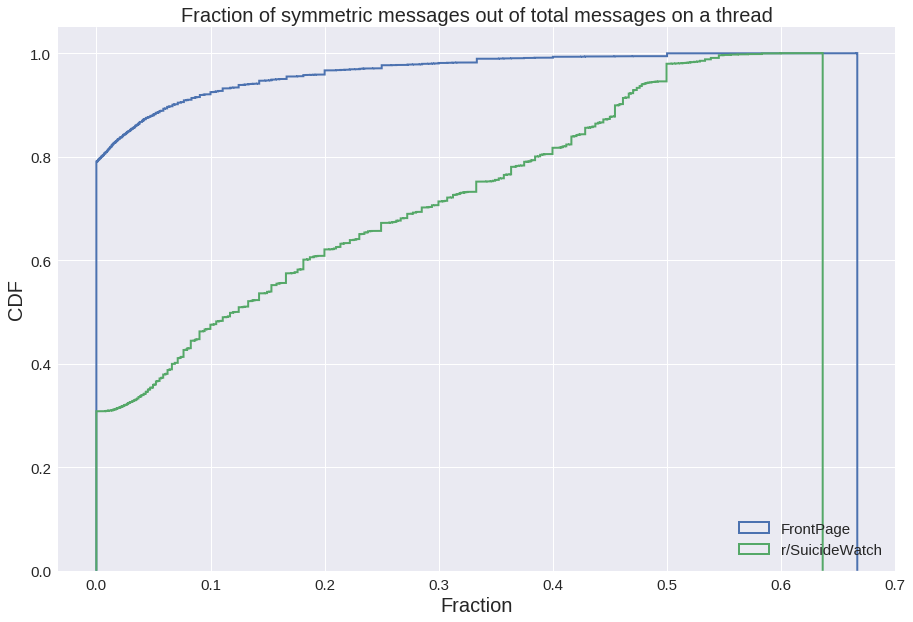

In [136]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [91]:
print np.median(BL_messageParti) , np.mean(BL_messageParti)
print np.median(SW_messageParti) , np.mean(SW_messageParti)

0.0 0.022968173782320675
0.12195121951219512 0.17900398004178422


In [92]:
print len(BL_messageParti), len(SW_messageParti)

stats , pvalue = findMannWhitney(BL_messageParti , SW_messageParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_messageParti , BL_messageParti)
print stats/normstats, pvalue

8706 8051
13995398.5 0.0
Samples are same size, no need to resample
0.36929883613092657 0.0


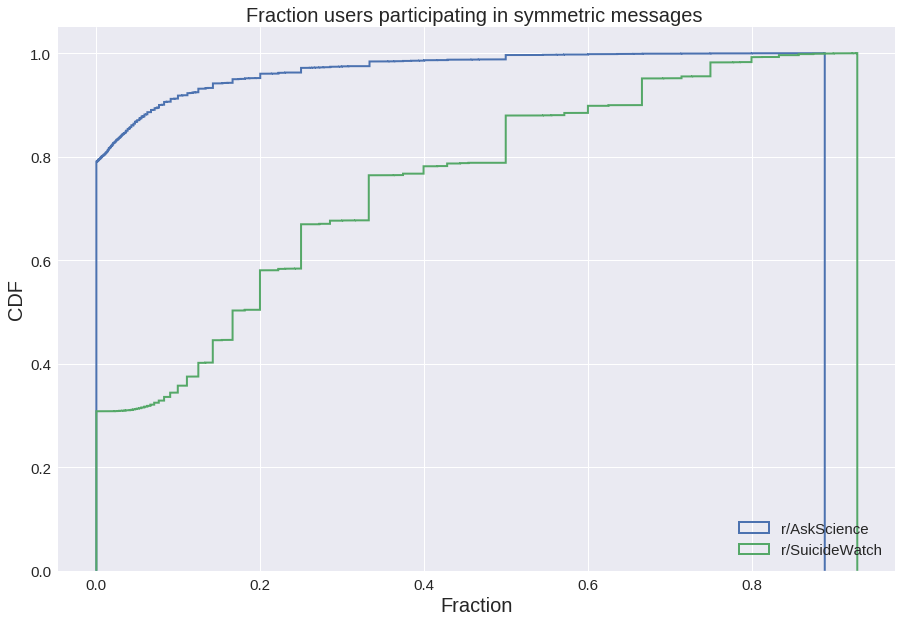

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [94]:
print np.median(BL_userParti) , np.mean(BL_userParti)
print np.median(SW_userParti) , np.mean(SW_userParti)

0.0 0.02707222138177867
0.16666666666666666 0.23343788845851693


In [95]:
print len(BL_userParti), len(SW_userParti)

stats , pvalue = findMannWhitney(BL_userParti , SW_userParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_userParti , BL_userParti)
print stats/normstats, pvalue

8706 8051
13680475.0 0.0
Samples are same size, no need to resample
0.3609888989740619 0.0


In [96]:
len(opAuthors_SW) , len(SW_bpusers)

(10157, 8053)

In [113]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(-1,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error


# def get

In [114]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(sampledReply_SW,SW_bpusers,opAuthors_SW)
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,31)
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,31)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

32 32 32 32


In [115]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,31)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,31)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

32 32 32 32


In [116]:
# sns.distplot(rootEmoDict[7])

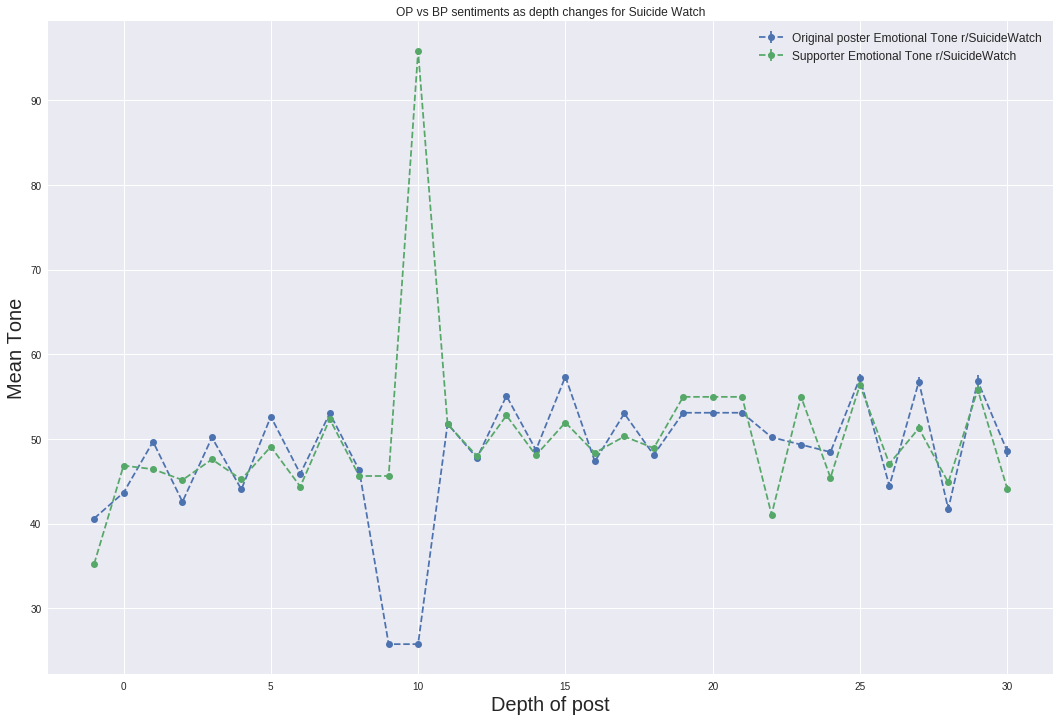

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

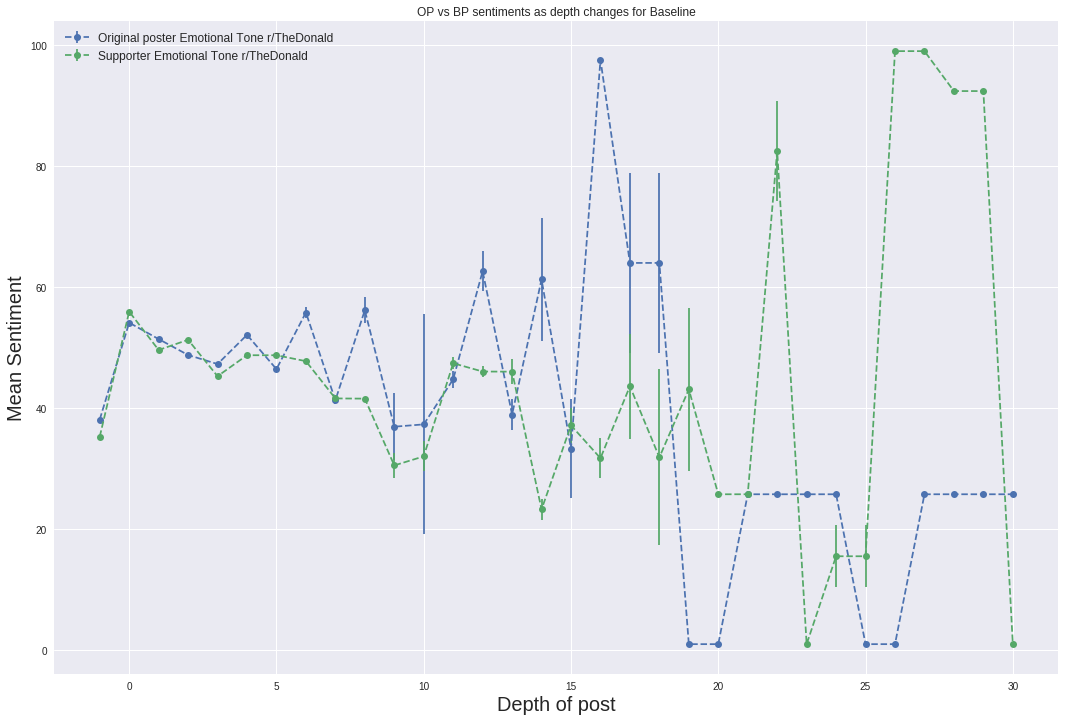

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/TheDonald' , 'Supporter Emotional Tone r/TheDonald'], fontsize=12)

In [119]:
triangleDist_SW = [sum(list(nx.triangles(sampledUgraphs_SW[k].to_undirected()).values()))/3 for k in sampledUgraphs_SW]
triangleDist_BL = [sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 for k in filteredUGraphs_BL]

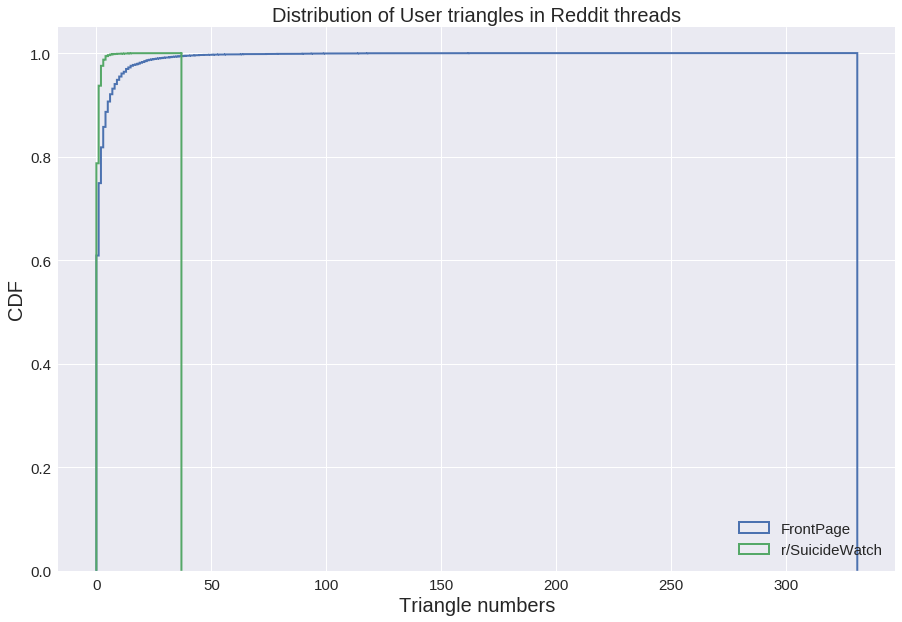

In [134]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [135]:
print len(triangleDist_BL), len(triangleDist_SW)

stats , pvalue = findMannWhitney(triangleDist_BL , triangleDist_SW)
print stats , pvalue
normstats , normpvalue = findMannWhitney(triangleDist_BL , triangleDist_BL)
print stats/normstats, pvalue

9096 8053
25451374.0 3.0196998626276874e-187
Samples are same size, no need to resample
0.6152339957873371 3.0196998626276874e-187


In [122]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [123]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [124]:
# len(SW_Posts)

In [324]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.ldamulticore import *
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import spacy
from spacy.lang.en import English
from __future__ import unicode_literals

In [386]:
class Tokenizer:
    def __init__(self):
#         print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        nlp = English()
#         self.spacytokenizer = English().Defaults.create_tokenizer(nlp)
        self.spacytokenizer = nlp.tokenizer
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())
    
    def spacyTokenize(self,text):
        return self.spacytokenizer(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
            texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
#         print tokens
        # remove stop words from tokens
        stopped_tokens = [i.orth_ for i in tokens if not i.orth_ in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

def tokenizeTextsSpacy(textList):
    toc_texts = []
    tokenizer = Tokenizer()
    for i in textList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
        cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
        toc_texts.append(cleaned_tokens)
    return toc_texts

def getTextTopicsSpacy(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    topics = model.get_document_topics(dictionary.doc2bow(cleaned_tokens))
    return topics
        
def getTextTopics(text,model):
    raw = text.lower()
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenizeByRegEx(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     print stemmed_tokens
    topics = model.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    return topics

In [323]:
len(opAuthors_SW), len(allGraphs_SW)

(10157, 10157)

In [281]:
SW_bpusers_all

{'vj5co': [u'zombiemeds'],
 '1uv2vj': [],
 'fjatc': [u'dead_by_saturday'],
 '1x6boy': [u'throwawayacct424'],
 '97akw': [u'[deleted]', u'PossiblePerson'],
 '3ci391': [u'peanutpeepz'],
 's79sc': [u'fuck_usernames123'],
 '2tjz9s': [u'BearDidIt'],
 'b0mvj': [u'itisover'],
 '2u23m8': [],
 'e9cx6': [],
 '19iji1': [u'IamANidiot21'],
 'mae5s': [],
 'ci9lz': [u'dontwannabehere'],
 '24gto5': [u'youcaughtthelight'],
 'dwd3s': [],
 '29en0c': [u'Ingvarkarlsson', u'throwawaybcirl'],
 '37zjrf': [u'pathfinder89'],
 '1cz1sd': [u'KimmyJongJong'],
 'ee901': [u'comb_over', u'southernbrew08'],
 '2nnud5': [],
 '2wo3jj': [u'throwitbitch1'],
 '1h1vqu': [u'nopointnow', u'rainbowtwinkies'],
 '16hiex': [u'griffin_desantos'],
 'e1hjc': [u'[deleted]'],
 'osxp1': [u'bleepitybleep', u'[deleted]', u'skekze'],
 '1dptdp': [u'muramana', u'endlesswatchdog'],
 '2lhvye': [],
 '2at60d': [u'Jessica-EdgeBlade'],
 '1p4pqm': [u'TMRobotic'],
 'ylt41': [],
 '2hip0u': [u'Missing_love'],
 'xwu8q': [u'1800HEYGTFO'],
 '1dqizr': [u'bu

In [282]:
# print len(SW_bpusers_all)
# with open("BpUserDict.pkl",'wb') as f:
#     pkl.dump(SW_bpusers_all,f)

In [283]:
Multiple_BP = {}
allUsers = []
for k in SW_bpusers_all:
    for u in SW_bpusers_all[k]:
        if u in allUsers:
            if u not in Multiple_BP:
                Multiple_BP[u] = 2
            else:
                Multiple_BP[u]+=1
        else:
            allUsers.append(u)
    
    

In [284]:
del Multiple_BP['[deleted]']

In [285]:
len(Multiple_BP)

979

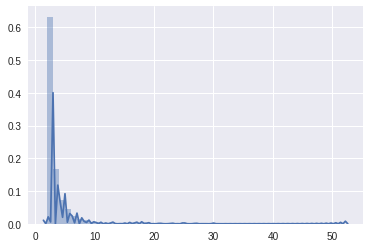

In [286]:
sns.distplot(Multiple_BP.values())

In [287]:
SW_multbpUsers = {}
for k in SW_bpusers_all:
    SW_multbpUsers[k] = []
    for m in SW_bpusers_all[k]:
        if m in Multiple_BP.keys():
            SW_multbpUsers[k].append(m)

In [288]:
# with open("multipleBP.pkl",'wb') as f:
#     pkl.dump(SW_multbpUsers,f)

In [289]:
len(SW_bpusers)

8053

In [290]:
SW_IR_posts = getIRTexts(allGraphs_SW,opAuthors_SW,SW_bpusers)

In [291]:
SW_Texts = getAllText(allGraphs_SW)

{}


In [292]:
BL_Texts = getAllText(allGraphs_BL)

In [293]:
len(SW_IR_posts),len(SW_Texts),len(BL_Texts)

(77249, 207176, 576924)

In [294]:
# SW_IR_posts[:10]

In [295]:
opAuthors_SW['pfn0u']

u'gabstergirl'

In [296]:
SW_OP_posts = getOPTexts(allGraphs_SW,opAuthors_SW)


In [297]:
len(SW_OP_posts)

44489

In [298]:
# SW_OP_posts[:10]

In [299]:
SW_BP_posts = getBPTexts(allGraphs_SW, SW_bpusers)

In [300]:
SW_MultBP_posts = getBPTexts(allGraphs_SW,SW_multbpUsers)

In [301]:
len(SW_MultBP_posts)

19688

In [302]:
len(SW_BP_posts)

51513

In [303]:
# SW_BP_posts[:10]

In [304]:
sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [305]:
len(SW_OP_posts) , len(SW_BP_posts) , len(sampled_SW_IR_Posts)

(44489, 51513, 51513)

In [155]:
# OP_tokenized = tokenizeTexts(SW_OP_posts)
# BP_tokenized = tokenizeTexts(SW_BP_posts)
# IR_tokenized = tokenizeTexts(SW_IR_posts)

In [344]:
All_cleaned = tokenizeTextsSpacy(SW_Texts)

In [346]:
BL_cleaned = tokenizeTextsSpacy(BL_Texts)

In [157]:
# MultBP_tokenized = tokenizeTexts(SW_MultBP_posts)

In [347]:
len(All_cleaned) , len(BL_cleaned)

(207176, 576924)

In [348]:
# len(OP_tokenized) , len(BP_tokenized)

In [349]:
# OP_tokenized[1]

In [350]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(All_cleaned)
# dictionary_BP =gensim.corpora.Dictionary(BP_tokenized)
# dictionary_IR =gensim.corpora.Dictionary(IR_tokenized)

In [351]:
dictionary_BL = gensim.corpora.Dictionary(BL_cleaned)

In [352]:
# len(dictionary_BP), len(dictionary_IR)
len(dictionary) , len(dictionary_BL)

(174448, 370717)

In [353]:
# len(dictionary_OP) , len(dictionary_BP)

In [354]:
# convert tokenized documents into a document-term matrix
# corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
# corpus_BP = [dictionary.doc2bow(text) for text in BP_tokenized]
# corpus_IR = [dictionary.doc2bow(text) for text in IR_tokenized]

In [355]:
All_corpus = [dictionary.doc2bow(text) for text in All_cleaned]

In [356]:
All_BLcorpus = [dictionary_BL.doc2bow(text) for text in BL_cleaned]

In [357]:
# MultBP_corpus = [dictionary.doc2bow(text) for text in MultBP_tokenized]

# BP_tokenized[3]

# len(corpus_BP) , len(corpus_IR)

# len(corpus_BP)

# type(corpus_OP)

In [358]:
sampled_corpus = random.sample(All_corpus,10000)

In [ ]:
# ldamodel = LdaMulticore(sampled_corpus, id2word=dictionary, num_topics=200,workers=10) 
ldamodel = gensim.models.ldamodel.LdaModel(All_corpus, id2word=dictionary, num_topics=40) 

In [ ]:
ldamodel_BL = gensim.models.ldamodel.LdaModel(All_BLcorpus, id2word=dictionary_BL, num_topics=40) 

In [ ]:
# generate LDA model
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, num_topics=100, id2word = dictionary_OP, passes=20)
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, id2word=dictionary, num_topics=50) 

# ldamodel_IR = gensim.models.ldamodel.LdaModel(corpus_IR, id2word=dictionary, num_topics=20) 



# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, num_topics=100, id2word = dictionary_BP, passes=20)
# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, id2word=dictionary, num_topics=10) 

# ldamodel[All_corpus[11]]

# ldamodel_MultBP = gensim.models.ldamodel.LdaModel(MultBP_corpus, id2word=dictionary, num_topics=10) 

In [ ]:
pyLDAvis.enable_notebook()
topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel,corpus=sampled_corpus,dictionary=dictionary)
# pyLDAvis.display(topic_display)

In [363]:
pyLDAvis.display(topic_display)

In [ ]:
pyLDAvis.enable_notebook()
topic_display_BL = pyLDAvis.gensim.prepare(topic_model=ldamodel_BL,corpus=sampled_corpus,dictionary=dictionary_BL)

In [376]:
pyLDAvis.display(topic_display_BL)

In [377]:
ldamodel.save("SW_allcorpus_model")

In [378]:
ldamodel_BL.save("BL_allcorpus_model")

In [379]:


# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()
# bp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_BP,corpus=corpus_BP,dictionary=dictionary)
# pyLDAvis.display(bp_topic_display)

In [380]:
# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()

# ir_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_IR,corpus=corpus_IR,dictionary=dictionary)
# pyLDAvis.display(ir_topic_display)

In [381]:
# ldamodel_BP.print_topics(10)

# ldamodel_OP.print_topics(10)



In [382]:
# ldamodel_IR.print_topics(10)

In [383]:
dictionary.values().index('harm')

144554

In [384]:
# ldamodel.save("SW_Alltext.mdl")

In [391]:
topics1 = getTextTopicsSpacy("hello there this is the captain speaking, we are about to crash land. Brace for impact",ldamodel)
topics2 = getTextTopicsSpacy("The captian of the plane goes down with the plane when it crashes",ldamodel)
topics3 = getTextTopicsSpacy("Hello everyone, we are not going to crash land. This is the captain", ldamodel)

In [392]:
print topics1, topics2 , topics3

[(9, 0.12809053), (17, 0.12812501), (20, 0.1281595), (22, 0.12812501), (31, 0.12812501), (35, 0.253125)] [(23, 0.205), (25, 0.40500003), (32, 0.205)] [(14, 0.19774258), (17, 0.17563032), (22, 0.18836826), (31, 0.28825882)]


In [393]:
def findJaccardTopicsMetric(topicarray1, topicarray2):
    topicidx1 = [k[0] for k in topicarray1]
    topicidx2 = [k[0] for k in topicarray2]
    intersection = len(list(set(topicidx1).intersection(topicidx2)))
    union = (len(topicidx1) + len(topicidx2)) - intersection
    if union == 0.0:
        return 0.0
    return float(intersection) / float(union)

In [394]:
print findJaccardTopicsMetric(topics1 , topics2) , findJaccardTopicsMetric(topics2,topics3) , findJaccardTopicsMetric(topics1,topics3)

0.0 0.0 0.428571428571


In [395]:
def createTopicGraphs(replyGraphs,ldaModel, deletedUsers=None):
    topicGraphs = {}
    for i in replyGraphs:
        deleted = nx.get_node_attributes(replyGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(replyGraphs[i],'author')
        texts = nx.get_node_attributes(replyGraphs[i],'text')
        for e in replyGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
                
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = float((origWeight + jaccard))/2.0
                userGraph[src][dst]['weight'] = update
        topicGraphs[i] = userGraph
    return topicGraphs
    

In [ ]:
# topicUserGraphs = createTopicGraphs(allGraphs_SW,ldamodel)

In [ ]:
# topicUserGraphs_BL = createTopicGraphs(allGraphs_BL,ldamodel_BL)

In [ ]:
# Save Topic Graphs: 
with open("../Data/SW_TopicUgraphs.pkl",'wb') as f:
    pkl.dump(file=f , obj=topicUserGraphs)

In [ ]:
# Save Topic Graphs: 
with open("../Data/BL_TopicUgraphs.pkl",'wb') as f:
    pkl.dump(file=f , obj=topicUserGraphs_BL)

In [403]:
sizes = {}
for k in topicUserGraphs_BL:
    sizes[k] = len(topicUserGraphs_BL[k].nodes())

In [404]:
import operator
max(sizes.iteritems(), key=operator.itemgetter(1))[0]

u'7yv9cz'

In [405]:
nx.write_gexf(topicUserGraphs_BL['7yv9cz'] , "LargestFP.gexf",encoding="utf-8",prettyprint=True)

In [407]:
# drawUserGraph(topicUserGraphs_BL['7yv9cz'])

In [408]:
def createGiantTopicGraph(allGraphs,ldaModel,deletedUsers=None):
    userGraph = nx.DiGraph()
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
#         userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        texts = nx.get_node_attributes(allGraphs[i],'text')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
            
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = (origWeight + jaccard)
                userGraph[src][dst]['weight'] = update
    return userGraph

In [409]:
# giantTopicGraph = createGiantTopicGraph(allGraphs_SW,ldamodel)

In [410]:
def findWeightimbalance(graphs, userDict):
    userBalance = []
    reflectiveBalance = []
    for k in userDict:
        if len(userDict[k]) > 0:
            for u in userDict[k]:
                inEdges = graphs[k].in_edges(u,data=True)
                outEdges = graphs[k].out_edges(u,data=True)
                if len(inEdges) > 0 and len(outEdges) > 0:
                    inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                    outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                    if inWeight == 0.0:
                            continue
                    userBalance.append(outWeight/inWeight)
            for u in graphs[k].nodes():
                if u not in userDict[k]:
                    inEdges = graphs[k].in_edges(u,data=True)
                    outEdges = graphs[k].out_edges(u,data=True)
                    if len(inEdges) > 0 and len(outEdges) > 0:
                        inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                        if inWeight == 0.0:
                            continue
                        outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                        reflectiveBalance.append(outWeight/inWeight)
    return userBalance, random.sample(reflectiveBalance,len(userBalance))

            

In [411]:
BP_balance, genericUserBalance = findWeightimbalance(topicUserGraphs,SW_bpusers_all)

In [413]:
BL_balance, genericUserBalanceBL = findWeightimbalance(topicUserGraphs_BL , BL_bpusers)

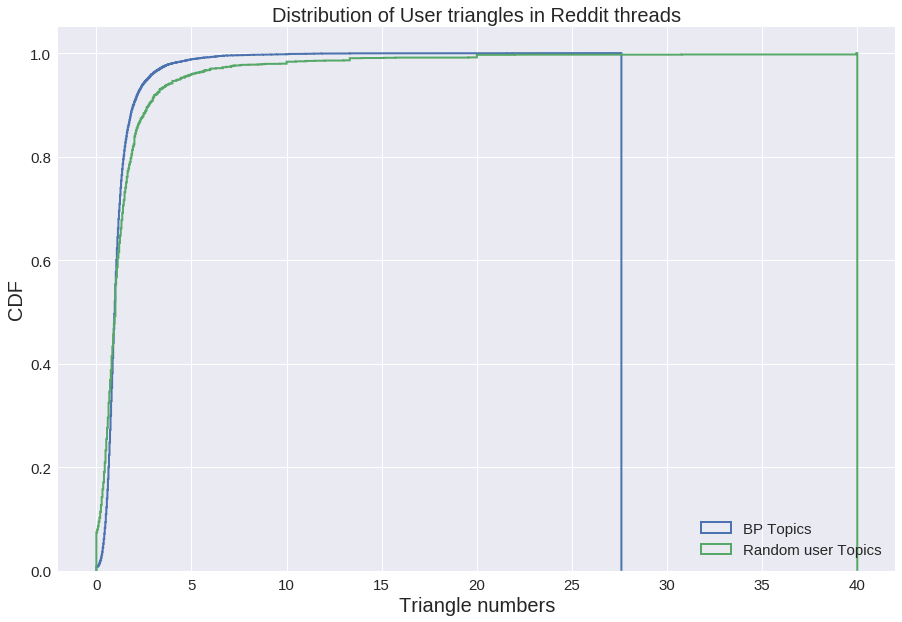

In [415]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BP_balance, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(genericUserBalanceBL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BP Topics','Random user Topics'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [417]:
# degrees = nx.degree_histogram(giantTopicGraph)

In [418]:
# print degrees

In [419]:
clusteringSW = {}
for k in topicUserGraphs:
    SW_clustering = nx.clustering(topicUserGraphs[k].to_undirected())
    clusteringSW[k] = SW_clustering

In [420]:
BP_clustering = []

for k in clusteringSW:
    if len(SW_bpusers_all[k]) > 0:
        for u in SW_bpusers_all[k]:
            BP_clustering.append(clusteringSW[k][u])

In [ ]:
sns.distplot(BP_clustering)

In [ ]:
#Save Giant Topic Graph: 
# with open("../Data/SW_GiantTopicGraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=giantTopicGraph)

In [ ]:
# nx.write_gpickle(giantTopicGraph,"../../node2vec/graph/SW_GiantTopicGraph.gpkl")
# nx.write_gexf(giantTopicGraph,"../Data/topicGraph.gexf")

In [ ]:
len(giantTopicGraph.nodes())